># **<center> AIRBNB LISTING BANGKOK </center>**


# Latar Belakang

Airbnb merupakan platform online untuk orang menyewa tempat tinggal sementara ketika berpergian ataupun berlibur melalui website atau aplikasi airbnb. Pengguna dapat menemukan berbagai jenis properti yang tersedia untuk di sewa, seperti rumah, apartemen, kamar pribadi, hotel, dan sebagainya.  

Walaupun banyak pilihan tempat tinggal yang tersedia, properti tersebut bukanlah milik airbnb sendiri. Melainkan airbnb adalah broker yang bekerjasama dengan pemilik properti untuk mengiklankan propertinya agar dengan mudah dijangkau oleh orang orang. Dengan begitu airbnb dapat memberikan manfaat pada pemilik properti dan penyewa.

Salah satu manfaatnya **pemilik properti dapat dengan mudah mendapatkan penyewa** dan airbnb akan mengambil komisi untuk jasanya disetiap pemesanan. Selain itu penyewa juga bisa memberikan **review pada properti yang disewa agar bisa menambah daya tarik properti** tersebut dan memikat calon penyewa selanjutnya. Dan review tersebut juga **menggambarkan popularitas dari properti karena semakin banyak review menandakan properti tersebut banyak disewa**.  

Sayangnya terdapat ketimpangan pada jumlah review properti yang terdaftar di airbnb bangkok. Sehingga tidak semua pemilik properti mendapat popularitas yang baik. Untuk itu diadakan analisis bagaimana cara meningkatkan review properti yang telah terdaftar di airbnb?


In [118]:
# df_clean['total_reviews'].describe()

## Pernyataan Masalah
Pada daftar properti yang telah terdaftar pada airbnb per tahun 2023, terdapat ketimpangan atas jumlah review yang diberikan oleh penyewa. hal ini ditunjukan dengan grafik berikut.

Dengan adanya permasalahan tersebut, sebagai seorang *data science*, kita akan membantu para pemilik properti yang telah terdaftar di airbnb ataupun pemilik properti yang berminat untuk bekerja sama dengan airbnb untuk **meningkatkan review properti di airbnb agar banyak penyewa yang menyewa properti mereka**, dengan menjawab pertanyaan berikut:

- **Bagaimana karakteristik properti yang telah direview di Bangkok?**
- **Bagaimana menentukan properti agar memungkinkan menjadi populer (banyak direview) di Bangkok?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data properti yang sudah terdaftar pada AirBNB listing Bangkok. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF).  

Dataset terdiri dari 15854 data properti yang terdaftar pada AirBNB, dengan 13 variabel yang menjelaskan karakteristik properti tersebut.


# **Data Understanding untuk memahami tabel data pada AirBNB Bangkok**


| No. | Fitur | Deskripsi |
|-|-|-|
| 1. | **ID** | Identifikasi unik AirBNB untuk setiap listing. |
| 2. | **Name** | Nama Daftar. |
| 3. | **host_id** | ID Unik airBNB untuk setiap host/user. |
| 4. | **host_name** | nama Host/Nama depan. |
| 5. | **Neighborhood** | kode geografis lingkungan menggunakan garis lintang dan garis bujur terhadap lingkungan. |
| 6. | **Latitude** | Menggunakan proyeksi Sistem Geodesi Dunia (WGS84) untuk garis lintang.|
| 7. | **Longitude** |  Menggunakan proyeksi Sistem Geodesi Dunia (WGS84) untuk garis bujur.|
| 8. | **Room Type** | Tipe ruangan yang dimiliki oleh AirBNB Bangkok. |
| 9. | **Price** | Harga harian dalam mata uang lokal. Catatan, tanda $ dapat digunakan meskipun lokal. |
| 10. | **minimum_nights** | Jumlah minimum masa inap malam untuk listing (kalender aturan mungkin berbeda). |
| 11. | **number_of_reviews** | Jumlah ulasan yang dimiliki dalam daftar. |
| 12. | **availability_365** | Lama properti dapat dipesan dalam hari untuk pemesanan berikutnya  |
| 13. | **number_of_reviews_ltm** | Jumlah ulasan yang dimiliki listingan (dalam 12 bulan terakhir). |

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import missingno as ms
from wordcloud import WordCloud, STOPWORDS

In [120]:
df=pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
1   1316               1                  0         NaN                NaN   
2    800              60                  0         NaN                NaN   
3   1286               7                  2  2022-04-01               0.03   
4   1905               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

Unnamed: 0                  id  \
15849       15849  790465040741092826   
15850       15850  790474503157243541   
15851       15851  790475335086864240   
15852       15852  790475546213717328   
15853       15853  790476492384199044   

                                                     name    host_id  \
15849       素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   94899359   
15850  Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea  491526222   
15851   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15852   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   
15853   Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea  491526222   

       host_name neighbourhood   latitude   longitude     room_type  price  \
15849      Renee       Pra Wet  13.715132  100.653458  Private room   2298   
15850  Phakhamon   Ratchathewi  13.753052  100.538738  Private room   1429   
15851  Phakhamon   Ratchathewi  13.753169  100.538700  Private room   1214   
15852  Phakhamon   Ratchathewi  13.754789  100.538757  Private room   1214   
15853  Phakhamon   Ratchathewi  13.752960  100.540820  Private room   1214   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
15849              28                  0         NaN                NaN   
15850               1                  0         NaN                NaN   
15851               1                  0         NaN                NaN   
15852               1                  0         NaN                NaN   
15853               1                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
15849                               1               362                      0  
15850                              14               365                      0  
15851                              14               365                      0  
15852                              14               365                      0  
15853                              14               365                      0

## Data Understanding
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi properti dari dataset airbnb listing.

In [121]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

Sekilas informasi dari data yang ada di dataset terdapat beberapa kesalahan dan anomali sebaga berikut :  
- Variabel yang tidak penting : `Unnamed:0,
- Nama variabel yang kurang jelas
- Kesalahan tipe data : `last_review`

In [122]:
display(df.describe().round(2), df.describe(include='object'))

Unnamed: 0            id       host_id  latitude  longitude  \
count    15854.00  1.585400e+04  1.585400e+04  15854.00   15854.00   
mean      7926.50  1.579397e+17  1.541058e+08     13.75     100.56   
std       4576.80  2.946015e+17  1.318726e+08      0.04       0.05   
min          0.00  2.793400e+04  5.892000e+04     13.53     100.33   
25%       3963.25  2.104509e+07  3.974431e+07     13.72     100.53   
50%       7926.50  3.503734e+07  1.224556e+08     13.74     100.56   
75%      11889.75  5.256154e+07  2.390547e+08     13.76     100.59   
max      15853.00  7.908162e+17  4.926659e+08     13.95     100.92   

            price  minimum_nights  number_of_reviews  reviews_per_month  \
count    15854.00        15854.00           15854.00           10064.00   
mean      3217.70           15.29              16.65               0.81   
std      24972.12           50.82              40.61               1.09   
min          0.00            1.00               0.00               0.01   
25%        900.00            1.00               0.00               0.12   
50%       1429.00            1.00               2.00               0.44   
75%       2429.00            7.00              13.00               1.06   
max    1100000.00         1125.00            1224.00              19.13   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                        15854.00          15854.00               15854.00  
mean                            13.89            244.38                   3.48  
std                             30.27            125.84                   8.92  
min                              1.00              0.00                   0.00  
25%                              1.00            138.00                   0.00  
50%                              4.00            309.00                   0.00  
75%                             13.00            360.00                   3.00  
max                            228.00            365.00                 325.00

name host_name  \
count                                              15846     15853   
unique                                             14794      5312   
top     New!  La Chada Night Market studio 2PPL near MRT     Curry   
freq                                                  45       228   

       neighbourhood        room_type last_review  
count          15854            15854       10064  
unique            50                4        1669  
top          Vadhana  Entire home/apt  2022-12-11  
freq            2153             8912         189

Dari statistika deskriptif didapat anomali sebagai berikut :  
- Terdapat outlier dari variabel numerik ditandai dengan nilai mean dan median jauh berbeda.
- Terdapat missing value pada beberapa variabel ditandai dengan nilai count dari variabel lebih kecil daripada jumlah data.


In [123]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0                       Unnamed: 0             15854   
1                               id             15854   
2                             name             14794   
3                          host_id              6659   
4                        host_name              5312   
5                    neighbourhood                50   
6                         latitude              9606   
7                        longitude             10224   
8                        room_type                 4   
9                            price              3040   
10                  minimum_nights                86   
11               number_of_reviews               298   
12                     last_review              1669   
13               reviews_per_month               513   
14  calculated_host_listings_count                50   
15                availability_365               366   
16           number_of_reviews_ltm                85   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Dari nilai unik masing-masing variabel didapatkan masalah :
- Karena terdapat variabel unik yaitu id maka ada kemungkinan adanya data duplikat jika variabel id dihilangkan.
- terdapat perbedaan inputasi nama properti

Secara umum, kita bisa melihat bahwa:
* dataset hr_analytics memiliki 17 kolom dan 15854 baris
* kolom tersebut adalah : `Unnamed: 0`, `id`, `name`, `host_id`, `host_name`, `neighbourhood`,`latitude`, `longitude`, `room_type`, `price`, `minimum_nights`,`number_of_reviews`, `last_review`, `reviews_per_month`,`calculated_host_listings_count`, `availability_365`,`number_of_reviews_ltm`.
* kolom `name`, `host_id`, `host_name`, `last_review`, `reviews_per_month` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* setiap baris merepresentasikan unit yang disewakan AirBnb di bangkok
* ada ketidakseuaian pada kolom `host id` dan `host name` yang harusnya memiliki jumlah unique yang sama.
* pada kolom `minimum_nights` memiliki data ekstrim yang perlu diidentifikasi lebih lanjut.
* ada beberapa kolom yang tidak perlu dimasukkan kedalam analisis seperti `Unnamed: 0`.

Dari pengamatan diatas dapat dikatakan bahwa dataset ini masih belum bersih, sehingga perlu dilakukan data cleaning dan preprocessing. beberapa kesalahan dan anomali antara lain :  
- Kesalahan inputasi
- Kesalahan tipe data
- Variabel tidak penting
- Extract dan transformasi variabel baru dari variabel `nama` dan `minimum night`
- Indetifikasi dan Handling anomali data (data duplikat, data missing, data outlier)

## Data Cleaning  

Dari data understanding, dapat dipahami bahwa terdapat masalah dalam data sehingga perlu dilakukan proses pembersihan pada masing masing permasalahan.

### Kesalahan inputasi

Menghapus Kolom Tidak Penting

In [124]:
df = df.drop(columns="Unnamed: 0")

Mengganti nama variabel

In [125]:
df = df.rename({"number_of_reviews" : "total_reviews","calculated_host_listings_count":"ownership_amount","availability_365":"day_availability","number_of_reviews_ltm":"last_12months_review"},axis=1)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights', 'total_reviews',
       'last_review', 'reviews_per_month', 'ownership_amount',
       'day_availability', 'last_12months_review'],
      dtype='object')

Variabel `day_availability` bernilai 0.

Nilai variabel ini dipengarui oleh banyaknya penyewaan dan kebijakan pemilik. Jika bernilai 0 maka properti tidak bisa disewa lagi, karena sudah penuh ataupun ditutup oleh pemilik. Namun karena kebutuhan analisis diperuntukan pada pemilik properti bukan untuk penyewa properti maka data tersebut akan dipertahankan.

In [126]:
n = df.loc[df['day_availability']==0,'id'].count()
print(f"jumlah data = {n}")
df.loc[df['day_availability']==0]

jumlah data = 857


id                                                name  \
51                1019241                 Chic two bedroom for Monthly rental   
61                1041976   Long-stay special rate spacious entire floor Siam   
104                527553         Beautiful Apt @ Ratchayothin BTS, Free Wifi   
141               1244333    Private Room@Chatuchak,BTS,JJ market,DMK airport   
152               1316688               Contemporary Modern Duplex - Thonglor   
...                   ...                                                 ...   
15431  779396995711655318         The Inspired Luxury: 1BR/MRT/Pool/JODD Fair   
15433  779434871544801466  The Grand Luxury Suite:2BR 2WC /High Floor/Netflix   
15438  779503507904940932                     Cosy Room near MBK Siam Paragon   
15498  780301430602562032        Chill Out With Love :1BR WIFI/JOOD Fair/Pool   
15499  780313530591194456   Nice Nice Luxury: 1BR/Asoke/BTS/Shopping mall/MRT   

         host_id host_name neighbourhood   latitude   longitude  \
51       3323622    Phoebe      Bang Rak  13.726870  100.527250   
61       5735895    Pariya   Parthum Wan  13.748140  100.520160   
104      2592798    Nokina    Chatu Chak  13.828410  100.571030   
141      2087671     Apipu    Phaya Thai  13.792210  100.546310   
152      5394070       Eva   Khlong Toei  13.722420  100.579620   
...          ...       ...           ...        ...         ...   
15431  133082557      Jean   Huai Khwang  13.753800  100.574680   
15433  133082557      Jean   Huai Khwang  13.759550  100.569950   
15438  214984794      Sita   Parthum Wan  13.741934  100.524283   
15498  132745392        Mt   Huai Khwang  13.753780  100.574480   
15499  133082557      Jean   Khlong Toei  13.738050  100.557970   

             room_type  price  minimum_nights  total_reviews last_review  \
51     Entire home/apt   2701              30            104  2020-02-20   
61     Entire home/apt   2900            1125            295  2021-08-21   
104    Entire home/apt   1004               2             24  2018-07-22   
141       Private room    399               1             33  2020-03-15   
152    Entire home/apt   1489              30             81  2022-10-07   
...                ...    ...             ...            ...         ...   
15431  Entire home/apt   1400               2              0         NaN   
15433  Entire home/apt   3000               1              0         NaN   
15438     Private room   1879               1              0         NaN   
15498  Entire home/apt   1000               2              0         NaN   
15499  Entire home/apt   1200               2              0         NaN   

       reviews_per_month  ownership_amount  day_availability  \
51                  0.89                 1                 0   
61                  2.61                 3                 0   
104                 0.19                 2                 0   
141                 0.78                 1                 0   
152                 0.72                 1                 0   
...                  ...               ...               ...   
15431                NaN                19                 0   
15433                NaN                19                 0   
15438                NaN                10                 0   
15498                NaN                25                 0   
15499                NaN                19                 0   

       last_12months_review  
51                        0  
61                        0  
104                       0  
141                       0  
152                       3  
...                     ...  
15431                     0  
15433                     0  
15438                     0  
15498                     0  
15499                     0  

[857 rows x 16 columns]

### Kesalahan Tipe Data

Mengganti Tipe Data Kolom last_review menjadi datetime

In [127]:
df["last_review"] = pd.to_datetime(df["last_review"])

### Missing Value

#### Identifikasi missing value

In [128]:
# jumlah persentase missing value di tiap kolom
persen = df.isna().sum()/df.shape[0]*100
jumlah = df.isna().sum()
pd.concat([jumlah,persen],axis=1).rename({0:"Sum",1:"Percent"},axis=1).round(2)

Sum  Percent
id                       0     0.00
name                     8     0.05
host_id                  0     0.00
host_name                1     0.01
neighbourhood            0     0.00
latitude                 0     0.00
longitude                0     0.00
room_type                0     0.00
price                    0     0.00
minimum_nights           0     0.00
total_reviews            0     0.00
last_review           5790    36.52
reviews_per_month     5790    36.52
ownership_amount         0     0.00
day_availability         0     0.00
last_12months_review     0     0.00

<Axes: >

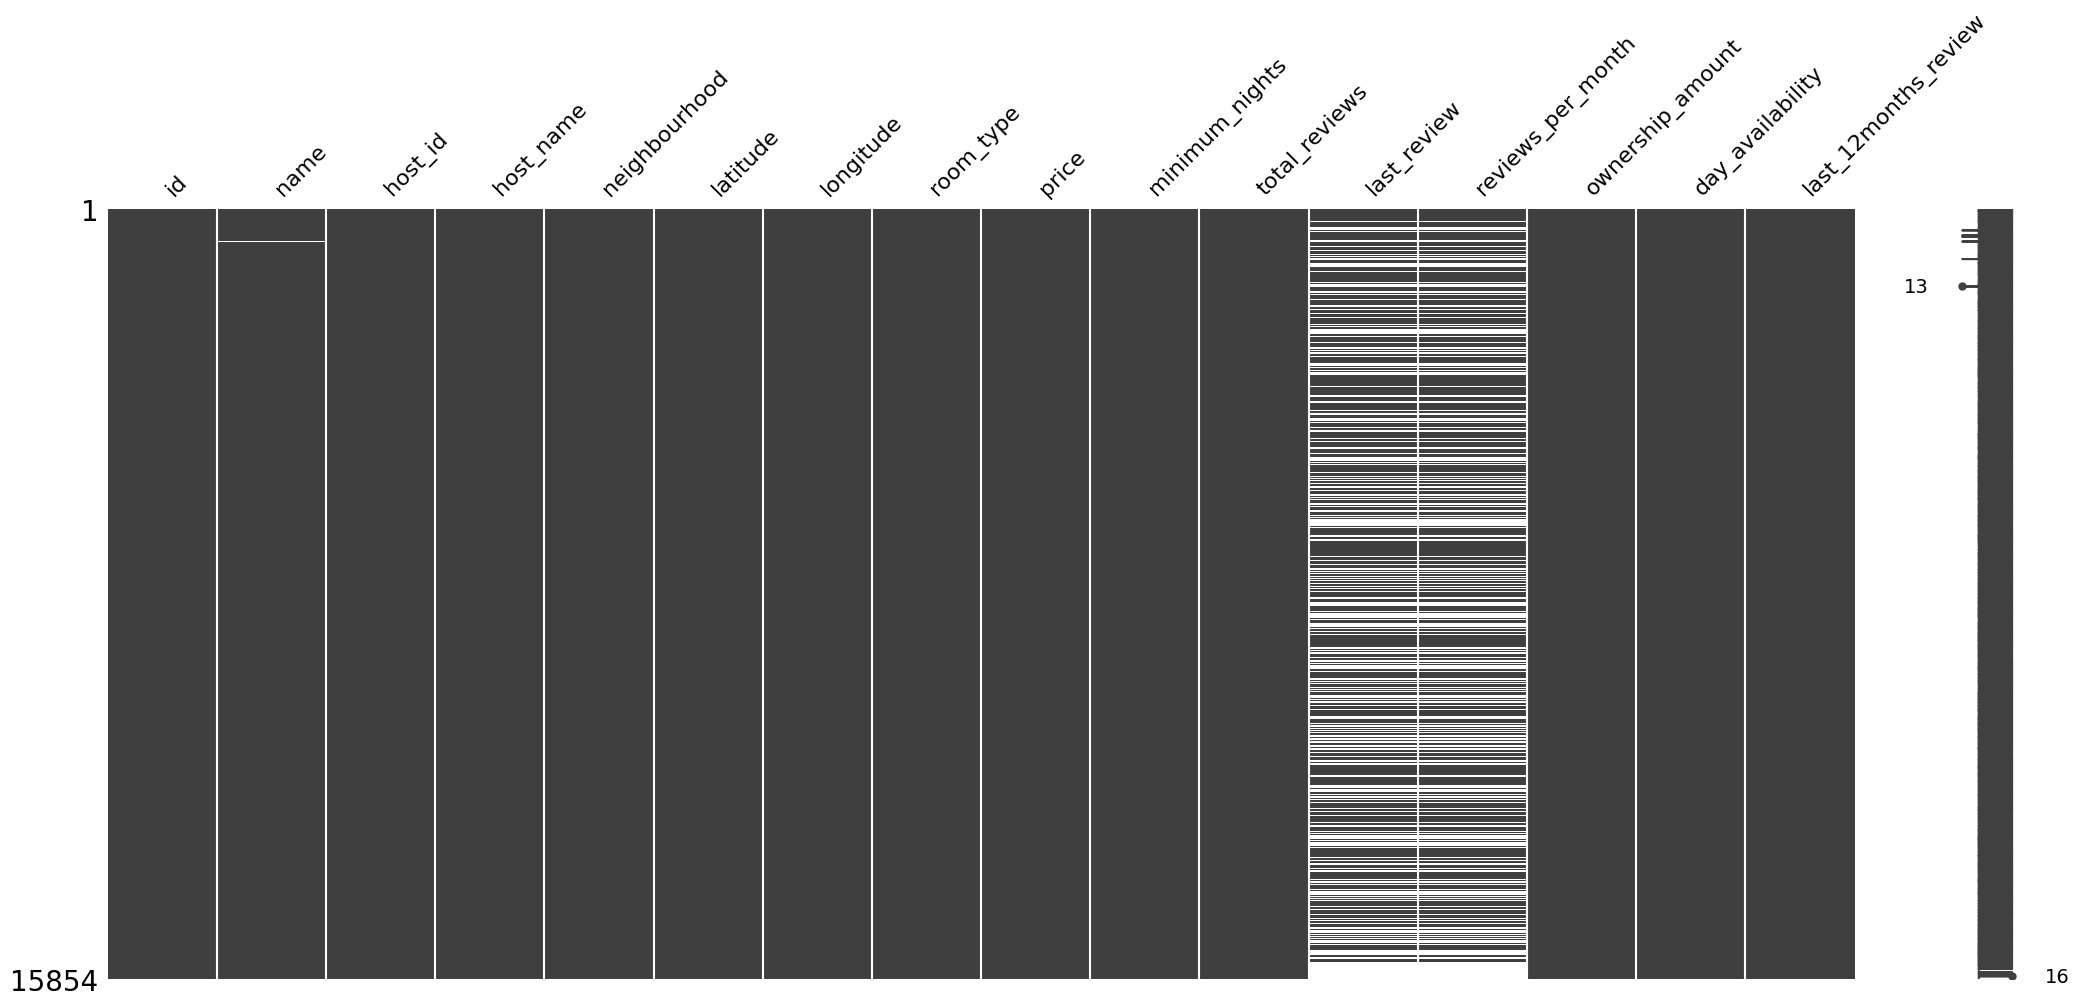

In [129]:
ms.matrix(df)

<Axes: >

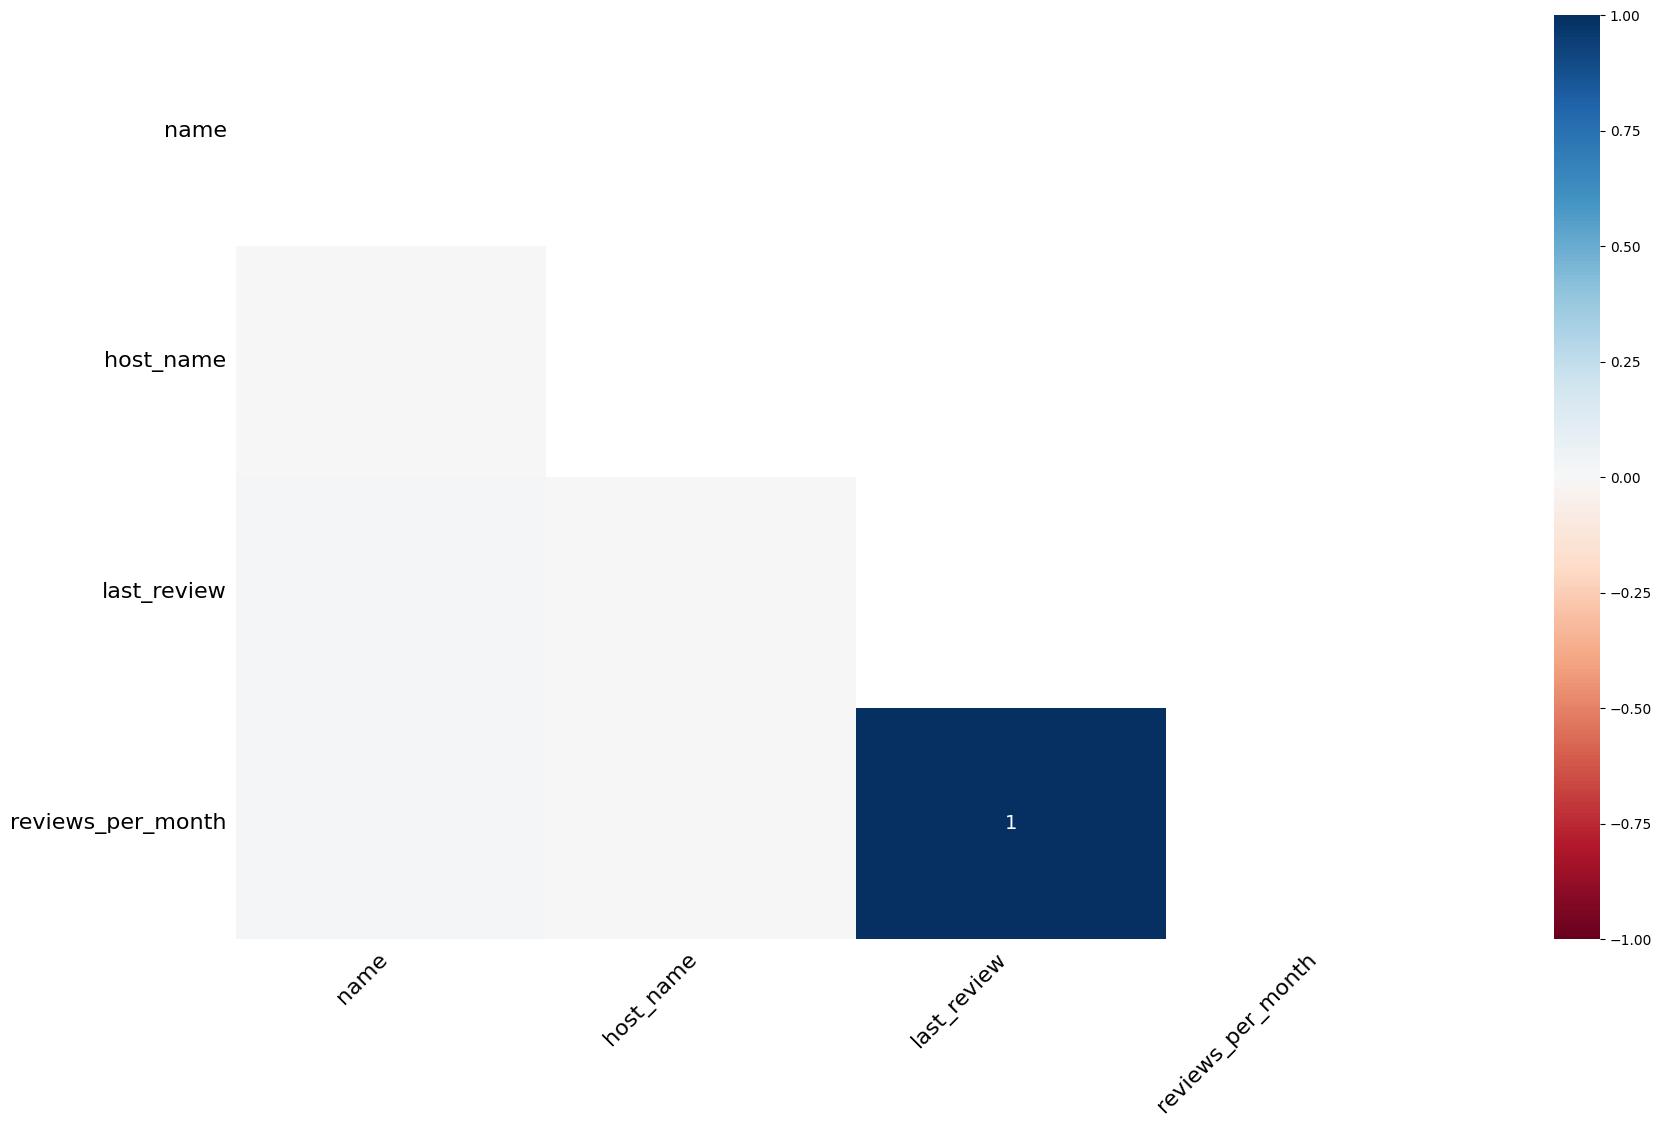

In [130]:
ms.heatmap(df)

Secara garis besar:
* Terdapat missing value pada 4 variabel yaitu `name`, `host_name`, `last_review`, `reviews_per_month` dimana jika `last_review` bernilai kosong maka variabel `reviews_per_month` hal ini menandakan bahwa missing valuenya bertipe MAR (Missing At Random).
* *missing value* di kolom `last_review`, `reviews_per_month` memiliki proporsi yang cukup tinggi (>10%), dengan missing value di kedua kolom mencapai 36.52%.
* *missing value* di kolom `name` dan `host_name` dapat dikaitkan dengan kolom `host_id` yang tidak memiliki data kosong sehingga dapat dicari nilai kosongnya.

Kita sudah melihat gambaran kasar missing data di dalam masing masing variabel. Selanjutnya identifikasi missing value di masing masing variabel dan mengatasinya  

#### Missing value pada variabel `name` dan `host_name`


**Variabel host_name**

In [131]:
df.loc[df['host_name'].isna()]

id           name    host_id host_name neighbourhood  latitude  \
3571  19682464  Cozy Hideaway  137488762       NaN     Bang Kapi  13.76999   

      longitude     room_type  price  minimum_nights  total_reviews  \
3571  100.63769  Private room   1399               3              1   

     last_review  reviews_per_month  ownership_amount  day_availability  \
3571  2017-07-29               0.02                 1               365   

      last_12months_review  
3571                     0

pada variabel `host_name` terdapat 1 missing value, dimana dapat dicari jika terdapat host_id yang sama atau name yang sama dengan data missing value.

In [132]:
# cek apakah ada host id yang sama
df.loc[df['host_id']==137488762]

id           name    host_id host_name neighbourhood  latitude  \
3571  19682464  Cozy Hideaway  137488762       NaN     Bang Kapi  13.76999   

      longitude     room_type  price  minimum_nights  total_reviews  \
3571  100.63769  Private room   1399               3              1   

     last_review  reviews_per_month  ownership_amount  day_availability  \
3571  2017-07-29               0.02                 1               365   

      last_12months_review  
3571                     0

In [133]:
# cek apakah ada name yang sama
df.loc[df['name']=="Cozy Hideaway"]

id           name    host_id host_name neighbourhood  latitude  \
3571  19682464  Cozy Hideaway  137488762       NaN     Bang Kapi  13.76999   

      longitude     room_type  price  minimum_nights  total_reviews  \
3571  100.63769  Private room   1399               3              1   

     last_review  reviews_per_month  ownership_amount  day_availability  \
3571  2017-07-29               0.02                 1               365   

      last_12months_review  
3571                     0

karena tidak ada informasi yang didapat maka kolom `host_name` memiliki missing value bertipe MCAR. sehinga akan kita isikan dengan nilai 'unknown'

**Variabel name**

In [134]:
df.loc[df['name'].isna()]

id name   host_id        host_name neighbourhood  latitude  \
439    4549768  NaN  18852579          Titawan  Phra Khanong  13.69406   
544    4720818  NaN  24386225           Cherry     Din Daeng  13.77562   
572    4245018  NaN  22030043        Parichart    Bang Phlat  13.78376   
669    6148415  NaN  31895202            Chira       Bang Na  13.68276   
1030   8055144  NaN  42521288          Nantida       Vadhana  13.74126   
1282  10000742  NaN  51374914  Diamond Bangkok   Ratchathewi  13.75328   
1594  10710165  NaN  55347997      Khaneungnit       Vadhana  13.71757   
2075  13142743  NaN  73275200         Pakaphol   Khlong Toei  13.72566   

      longitude        room_type  price  minimum_nights  total_reviews  \
439   100.59619     Private room   1080               5              0   
544   100.57346     Private room   1200               1              0   
572   100.49821     Private room   1200               1              0   
669   100.60894  Entire home/apt   2424               2              0   
1030  100.55761     Private room   5000               3              0   
1282  100.52928     Private room    930               1              6   
1594  100.60464     Private room   1000               1              0   
2075  100.56416     Private room    850               1              2   

     last_review  reviews_per_month  ownership_amount  day_availability  \
439          NaT                NaN                 1               365   
544          NaT                NaN                 1               365   
572          NaT                NaN                 1               365   
669          NaT                NaN                 1               365   
1030         NaT                NaN                 1               365   
1282  2017-05-13               0.07                 1               365   
1594         NaT                NaN                 1               365   
2075  2017-12-11               0.03                 3               220   

      last_12months_review  
439                      0  
544                      0  
572                      0  
669                      0  
1030                     0  
1282                     0  
1594                     0  
2075                     0

pada variabel `name` terdapat 8 missing value, dimana dapat dicari jika terdapat host_id yang sama atau name yang sama dengan data missing value.

In [135]:
#cek jika ada yang memiliki host_id yang sama
df.loc[df['host_id'].isin([18852579,24386225,22030043,31895202,42521288,51374914,55347997,73275200])]

id                name   host_id        host_name neighbourhood  \
439    4549768                 NaN  18852579          Titawan  Phra Khanong   
544    4720818                 NaN  24386225           Cherry     Din Daeng   
572    4245018                 NaN  22030043        Parichart    Bang Phlat   
669    6148415                 NaN  31895202            Chira       Bang Na   
1030   8055144                 NaN  42521288          Nantida       Vadhana   
1282  10000742                 NaN  51374914  Diamond Bangkok   Ratchathewi   
1594  10710165                 NaN  55347997      Khaneungnit       Vadhana   
1981  13400326  Errday Guest House  73275200         Pakaphol   Khlong Toei   
1982  13400758  Errday Guest House  73275200         Pakaphol   Khlong Toei   
2075  13142743                 NaN  73275200         Pakaphol   Khlong Toei   

      latitude  longitude        room_type  price  minimum_nights  \
439   13.69406  100.59619     Private room   1080               5   
544   13.77562  100.57346     Private room   1200               1   
572   13.78376  100.49821     Private room   1200               1   
669   13.68276  100.60894  Entire home/apt   2424               2   
1030  13.74126  100.55761     Private room   5000               3   
1282  13.75328  100.52928     Private room    930               1   
1594  13.71757  100.60464     Private room   1000               1   
1981  13.72427  100.56443     Private room    950               1   
1982  13.72373  100.56415     Private room  36363               1   
2075  13.72566  100.56416     Private room    850               1   

      total_reviews last_review  reviews_per_month  ownership_amount  \
439               0         NaT                NaN                 1   
544               0         NaT                NaN                 1   
572               0         NaT                NaN                 1   
669               0         NaT                NaN                 1   
1030              0         NaT                NaN                 1   
1282              6  2017-05-13               0.07                 1   
1594              0         NaT                NaN                 1   
1981              1  2020-02-19               0.03                 3   
1982              0         NaT                NaN                 3   
2075              2  2017-12-11               0.03                 3   

      day_availability  last_12months_review  
439                365                     0  
544                365                     0  
572                365                     0  
669                365                     0  
1030               365                     0  
1282               365                     0  
1594               365                     0  
1981                 1                     0  
1982                 1                     0  
2075               220                     0

Terdapat host_id dan host_name yang sama dengan missing data, maka missing valuenya bertipe MCAR, dan bisa diinputkan berdasarkan data pengamatan lain.

In [136]:
#inputasi kolom name berdasarkan kolom host_id yang sama
df.loc[2075,'name']="Errday Guest House"

Dari analisis di atas, kita sudah tau bahwa sisa *missing value* kolom `name` dan `host_name` yang tersisa adalah MCAR. Maka, kita memutuskan mengisikan *missing value* kedua kolom ini dengan unknown.  

In [137]:
df['name'] = df['name'].fillna('unknown')
df['host_name'] = df['host_name'].fillna('unknown')

In [138]:
df[['name','host_name']].isna().sum()

name         0
host_name    0
dtype: int64

Sekarang, data kosong sudah tidak ada pada variabel `name` dan `host_name`.

#### Missing value pada variabel `last_review` dan `reviews_per_month`
Selanjutnya, mari kita cek kolom `last_review` dan `reviews_per_month`. Kedua kolom ini tentunya saling berhubungan dengan total_reviews, dengan kolom `last_review` memiliki *missing value* sebanyak 36,52% (5790) dan `reviews_per_month` 36,52% (5790).



In [139]:
df[['last_review','reviews_per_month']].isna().sum()

last_review          5790
reviews_per_month    5790
dtype: int64

Pertama, mari kita cek kolom `number_of_reviews` dari data dengan kolom `last_review` yang kosong.

In [140]:
df[df['last_review'].isna()]['total_reviews'].value_counts()

total_reviews
0    5790
Name: count, dtype: int64

Bisa dilihat bahwa pada semua data yang kosong di kolom `last_review` memiliki data `number_of_reviews` 0. Kita bisa mengisi data kosong di kolom `last_review` dengan nilai 'not available'.

In [141]:
# mengisi data kosong di kolom `major_discipline` yang berisi 'High School' dan 'Primary School' di kolom `education_level` dengan 'not available'
df.loc[(df['last_review'].isna())&(df['total_reviews']==0),'last_review']='Not Yet Reviewed'

In [142]:
#cek sisa data kosong
df['last_review'].isna().sum()

0

In [143]:
df['last_review']

0        2020-01-06 00:00:00
1           Not Yet Reviewed
2           Not Yet Reviewed
3        2022-04-01 00:00:00
4           Not Yet Reviewed
                ...         
15849       Not Yet Reviewed
15850       Not Yet Reviewed
15851       Not Yet Reviewed
15852       Not Yet Reviewed
15853       Not Yet Reviewed
Name: last_review, Length: 15854, dtype: object

selanjutnya kita cek kolom `number_of_reviews` dari data dengan kolom `reviews_per_month` yang kosong.

In [144]:
df[df['reviews_per_month'].isna()]['total_reviews'].value_counts()

total_reviews
0    5790
Name: count, dtype: int64

Bisa dilihat bahwa pada semua data yang kosong di kolom `reviews_per_month` memiliki data `number_of_reviews` 0. Kita bisa mengisi data kosong di kolom `reviews_per_month` dengan nilai 0.

In [145]:
# mengisi data kosong di kolom `major_discipline` yang berisi 'High School' dan 'Primary School' di kolom `education_level` dengan 'not available'
df.loc[(df['reviews_per_month'].isna())&(df['total_reviews']==0),'reviews_per_month']=0

In [146]:
#cek sisa data kosong
df['reviews_per_month'].isna().sum()

0

Setelah pengisian di atas, sudah tidak ada data kosong yang tersisa di kolom `last_review` dan `reviews_per_month`.

### Data Duplikat

In [147]:
df.duplicated().sum()

0

In [148]:
df.drop(columns="id").duplicated().sum()

7

In [149]:
df.loc[df.drop(columns="id").duplicated(keep=False)]

id                                             name  \
5890             28831409                        NA BANGLAMPOO GUEST HOUSE   
5976             28907857                        NA BANGLAMPOO GUEST HOUSE   
8789             37953702                                           small1   
8790             37954129                                           small1   
15183  765632824291529126          Sathon Luxury 2 br/China Town/Icon Siam   
15186  765691389894680033          Sathon Luxury 2 br/China Town/Icon Siam   
15190  765716244664642439          Sathon Luxury 2 br/China Town/Icon Siam   
15191  765721954905526928          Sathon Luxury 2 br/China Town/Icon Siam   
15549  781507744450884041  Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9   
15550  781514912980696908  Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9   
15614  780889390373160493  Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9   
15615  780896408611028752  Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9   
15829  790278230325843023                         Family Room for 4 People   
15831  790280473547745220                         Family Room for 4 People   

         host_id host_name neighbourhood   latitude   longitude  \
5890    87704107       Yui   Phra Nakhon  13.762790  100.497900   
5976    87704107       Yui   Phra Nakhon  13.762790  100.497900   
8789    97598307       Soo    Don Mueang  13.920720  100.575780   
8790    97598307       Soo    Don Mueang  13.920720  100.575780   
15183  264864968    Tricia        Sathon  13.710777  100.519891   
15186  264864968    Tricia        Sathon  13.710777  100.519891   
15190  344327171     Alice        Sathon  13.710777  100.519891   
15191  344327171     Alice        Sathon  13.710777  100.519891   
15549   20133201    Willam   Huai Khwang  13.756184  100.568269   
15550   20133201    Willam   Huai Khwang  13.756184  100.568269   
15614  344327171     Alice   Huai Khwang  13.757097  100.568486   
15615  344327171     Alice   Huai Khwang  13.757097  100.568486   
15829  340188343    Rachan       Vadhana  13.740168  100.556320   
15831  340188343    Rachan       Vadhana  13.740168  100.556320   

             room_type  price  minimum_nights  total_reviews  \
5890      Private room   1400               1              0   
5976      Private room   1400               1              0   
8789       Shared room    350               1              0   
8790       Shared room    350               1              0   
15183  Entire home/apt   2221               1              0   
15186  Entire home/apt   2221               1              0   
15190  Entire home/apt   2221               1              0   
15191  Entire home/apt   2221               1              0   
15549  Entire home/apt   2533               3              0   
15550  Entire home/apt   2533               3              0   
15614  Entire home/apt   2533               3              0   
15615  Entire home/apt   2533               3              0   
15829     Private room   2237               1              0   
15831     Private room   2237               1              0   

            last_review  reviews_per_month  ownership_amount  \
5890   Not Yet Reviewed                0.0                 9   
5976   Not Yet Reviewed                0.0                 9   
8789   Not Yet Reviewed                0.0                 4   
8790   Not Yet Reviewed                0.0                 4   
15183  Not Yet Reviewed                0.0                44   
15186  Not Yet Reviewed                0.0                44   
15190  Not Yet Reviewed                0.0                40   
15191  Not Yet Reviewed                0.0                40   
15549  Not Yet Reviewed                0.0                33   
15550  Not Yet Reviewed                0.0                33   
15614  Not Yet Reviewed                0.0                40   
15615  Not Yet Reviewed                0.0                40   
15829  Not Yet Reviewed                0.0           

In [150]:
host_id_duplikat = df.loc[df.drop(columns="id").duplicated(keep=False),'host_id'].unique()
host_id_duplikat

array([ 87704107,  97598307, 264864968, 344327171,  20133201, 340188343])

In [151]:
for id in host_id_duplikat:
  if df.loc[df['host_id']==id,'id'].count() == df.loc[df['host_id']==id,'ownership_amount'].mean():
    continue
  else:
    print(f"Ada duplikat pada host_id : {id}")

Karena jumlah properti yang dimiliki sama dengan nilai variabel ownership amount maka ini mengindikasikan tidak ada duplikat, memang ada properti yang berbeda namun dengan lokasi yang berdekatan.

In [152]:
#df = df.drop(columns="id").drop_duplicated()
#df

### Data Outlier

In [153]:
df_num = df.select_dtypes('number').drop(columns=["id","host_id","latitude","longitude"])
df_num.head()

price  minimum_nights  total_reviews  reviews_per_month  ownership_amount  \
0   1905               3             65               0.50                 2   
1   1316               1              0               0.00                 2   
2    800              60              0               0.00                 1   
3   1286               7              2               0.03                 1   
4   1905               1              0               0.00                 3   

   day_availability  last_12months_review  
0               353                     0  
1               358                     0  
2               365                     0  
3               323                     1  
4               365                     0

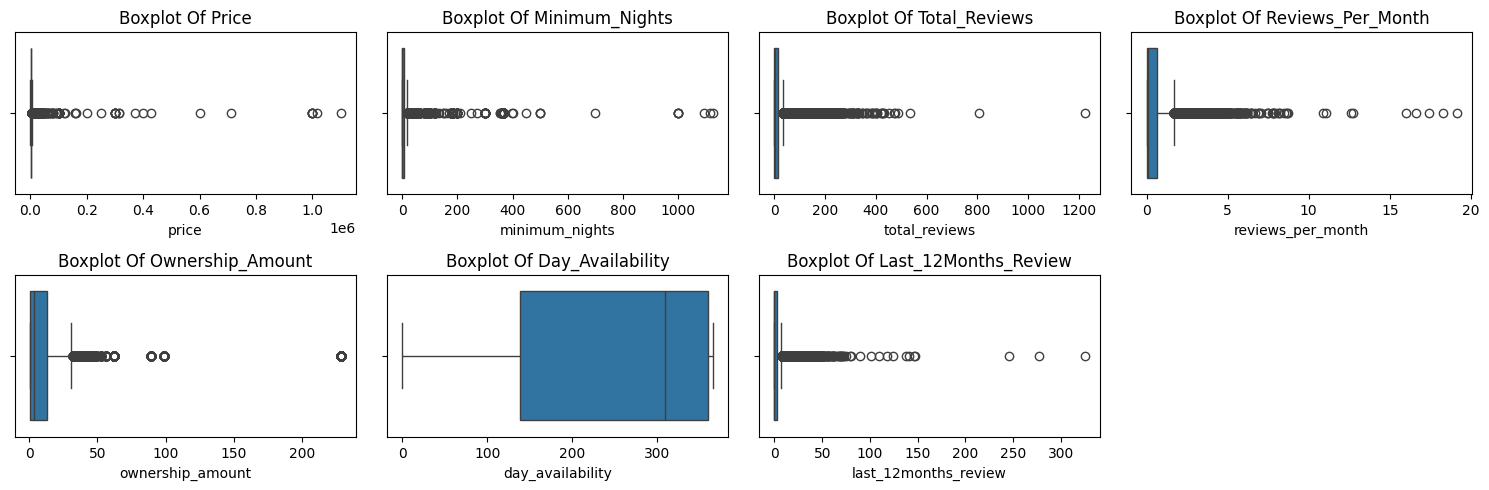

In [154]:
plt.figure(figsize = (15, 7))

for idx, col in enumerate(df_num.columns) :
  box = sns.boxplot(x=df[col], ax = plt.subplot(3, 4, idx + 1))
  box.set_title(f'Boxplot of {col}'.title())

plt.tight_layout()
plt.show()

Terdapat data outlier disetiap variabel numerik kecuali variabel Day_Availability.
- Variabel `total_review`, `review_per_month`, `last_12Months_review` terdapat outlier karena adanya properti yang belum pernah direview (bernilai 0). Sehingga untuk mengatasi hal ini maka data akan dibagi menjadi properti yang telah direview dan belum direview.  
- Variabel `minimum_night` akan diatasi nilai outliernya dengan mengelompokan menjadi sewa harian (0-7), mingguan (8-30), bulanan(31-365), dan tahunan (>365)
- Variabel `price` akan dilakukan pengelompokan harga dengan 3 kelas interval (murah, sedang, mahal)
- Variabel `ownership_amount` akan dibiarkan karena hanya digunakan untuk menunjukkan berapa banyak properti yang dimiliki pemilik pada analisis.

### Extract and Transform Feature

- Variabel note

In [155]:
df['note'] = df['total_reviews'].apply(lambda x:"Not Yet Reviewed" if x == 0 else "Has Been Reviewed")
df.head(3)

id                               name  host_id   host_name  \
0  27934    Nice room with superb city view   120437      Nuttee   
1  27979     Easy going landlord,easy place   120541         Emy   
2  28745  modern-style apartment in Bangkok   123784  Familyroom   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0   Ratchathewi  13.75983  100.54134  Entire home/apt   1905               3   
1       Bang Na  13.66818  100.61674     Private room   1316               1   
2     Bang Kapi  13.75232  100.62402     Private room    800              60   

   total_reviews          last_review  reviews_per_month  ownership_amount  \
0             65  2020-01-06 00:00:00                0.5                 2   
1              0     Not Yet Reviewed                0.0                 2   
2              0     Not Yet Reviewed                0.0                 1   

   day_availability  last_12months_review               note  
0               353                     0  Has Been Reviewed  
1               358                     0   Not Yet Reviewed  
2               365                     0   Not Yet Reviewed

- Variabel rental length

In [156]:
def rental_length (x):
  if x>=0 and x<=7:
    y="Daily"
  elif x>=8 and x<=30:
    y="Weekly"
  elif x>=31 and x<=365:
    y="Monthly"
  elif x>365:
    y="Yearly"
  return y

df['rental_length'] = df['minimum_nights'].apply(rental_length)
df.head(3)

id                               name  host_id   host_name  \
0  27934    Nice room with superb city view   120437      Nuttee   
1  27979     Easy going landlord,easy place   120541         Emy   
2  28745  modern-style apartment in Bangkok   123784  Familyroom   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0   Ratchathewi  13.75983  100.54134  Entire home/apt   1905               3   
1       Bang Na  13.66818  100.61674     Private room   1316               1   
2     Bang Kapi  13.75232  100.62402     Private room    800              60   

   total_reviews          last_review  reviews_per_month  ownership_amount  \
0             65  2020-01-06 00:00:00                0.5                 2   
1              0     Not Yet Reviewed                0.0                 2   
2              0     Not Yet Reviewed                0.0                 1   

   day_availability  last_12months_review               note rental_length  
0               353                     0  Has Been Reviewed         Daily  
1               358                     0   Not Yet Reviewed         Daily  
2               365                     0   Not Yet Reviewed       Monthly

- Variabel Cost

In [157]:
df['cost'] = pd.cut(df['price'],3,labels=['Cheap Price', 'Medium Price', 'Expensive Price'])
df.head(3)

id                               name  host_id   host_name  \
0  27934    Nice room with superb city view   120437      Nuttee   
1  27979     Easy going landlord,easy place   120541         Emy   
2  28745  modern-style apartment in Bangkok   123784  Familyroom   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0   Ratchathewi  13.75983  100.54134  Entire home/apt   1905               3   
1       Bang Na  13.66818  100.61674     Private room   1316               1   
2     Bang Kapi  13.75232  100.62402     Private room    800              60   

   total_reviews          last_review  reviews_per_month  ownership_amount  \
0             65  2020-01-06 00:00:00                0.5                 2   
1              0     Not Yet Reviewed                0.0                 2   
2              0     Not Yet Reviewed                0.0                 1   

   day_availability  last_12months_review               note rental_length  \
0               353                     0  Has Been Reviewed         Daily   
1               358                     0   Not Yet Reviewed         Daily   
2               365                     0   Not Yet Reviewed       Monthly   

          cost  
0  Cheap Price  
1  Cheap Price  
2  Cheap Price

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [158]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
tabel1Desc

dataFeatures  dataType  null  unique  \
0                     id     int64     0   15854   
1                   name    object     0   14795   
2                host_id     int64     0    6659   
3              host_name    object     0    5313   
4          neighbourhood    object     0      50   
5               latitude   float64     0    9606   
6              longitude   float64     0   10224   
7              room_type    object     0       4   
8                  price     int64     0    3040   
9         minimum_nights     int64     0      86   
10         total_reviews     int64     0     298   
11           last_review    object     0    1670   
12     reviews_per_month   float64     0     514   
13      ownership_amount     int64     0      50   
14      day_availability     int64     0     366   
15  last_12months_review     int64     0      85   
16                  note    object     0       2   
17         rental_length    object     0       4   
18                  cost  category     0       3   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [159]:
df_clean = df.copy()

In [160]:
# from google.colab import files
# df_clean.to_excel('Airbnb Listings Bangkok Clean.xlsx')
# files.download('Airbnb Listings Bangkok Clean.xlsx')

# Data Analysis
Kita sudah melakukan tahap _data cleaning_ dan _data preprocessing_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **bagaimana karakteristik properti yang populer yang di listing pada AirBNB Bangkok**.  


## Variabel Target

- **Variabel Total Reviews**  
Variabel ini menunjukkan kepopuleran properti, dimana semakin banyak total review dapat dikatakan semakin banyak juga pengunjung yang telah menyewa

In [161]:
df['total_reviews'].describe().round(2)

count    15854.00
mean        16.65
std         40.61
min          0.00
25%          0.00
50%          2.00
75%         13.00
max       1224.00
Name: total_reviews, dtype: float64

In [162]:
grup = df.groupby('note')['id'].count()
grup

note
Has Been Reviewed    10064
Not Yet Reviewed      5790
Name: id, dtype: int64

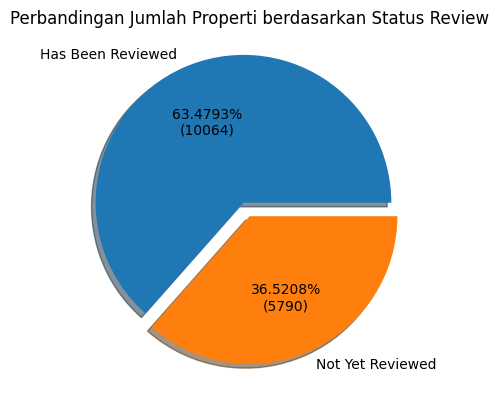

In [163]:
def labelku(x):
    return '{:.4f}%\n({:.0f})'.format(x, len(df)*x/100)

plt.pie(x=grup,labels=grup.index, autopct=labelku, explode=[0.1,0],shadow=True)
plt.title('Perbandingan Jumlah Properti berdasarkan Status Review')
plt.show()

In [164]:
df_review = df.loc[df['total_reviews']>0]

In [165]:
df_review['total_reviews'].describe()

count    10064.000000
mean        26.235592
std         48.446789
min          1.000000
25%          2.000000
50%          8.000000
75%         28.000000
max       1224.000000
Name: total_reviews, dtype: float64

In [166]:
iqr =df_review['total_reviews'].quantile(0.75) -df_review['total_reviews'].quantile(0.25)
b_atas =df_review['total_reviews'].quantile(0.75) + 1.5*iqr
b_bawah = df_review['total_reviews'].quantile(0.25) - 1.5*iqr

Text(0.5, 1.0, 'Persebaran Total Review')

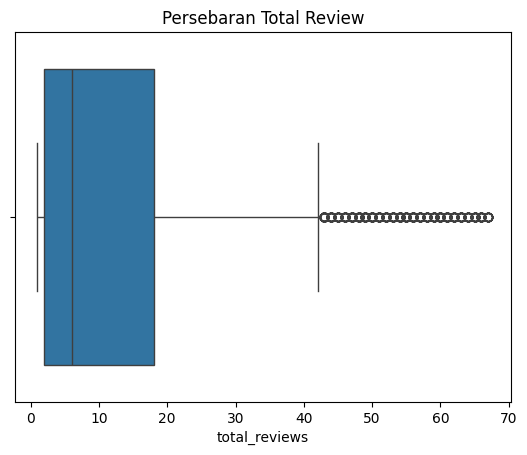

In [167]:
sns.boxplot(data=df_review.loc[(df['total_reviews']>=b_bawah)&(df['total_reviews']<=b_atas)],x='total_reviews')
plt.title('Persebaran Total Review')

Text(0.5, 1.0, 'Persebaran Total Review Berdasarkan Room Type')

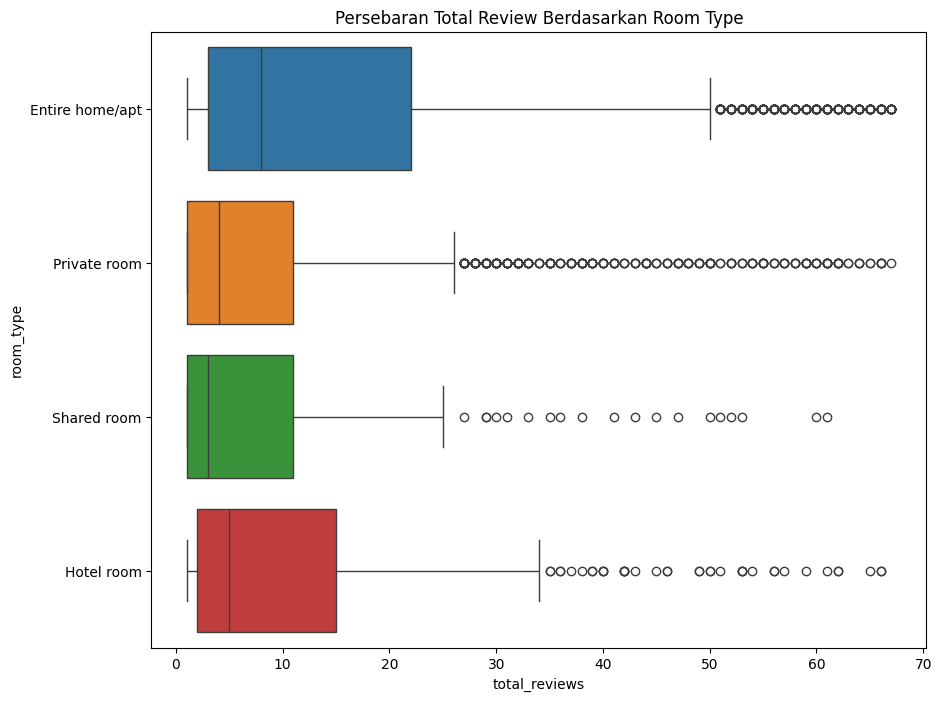

In [168]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_review.loc[(df['total_reviews']>=b_bawah)&(df['total_reviews']<=b_atas)],x='total_reviews',y='room_type',hue='room_type')
plt.title('Persebaran Total Review Berdasarkan Room Type')

In [169]:
df.groupby('note')['price'].mean()

note
Has Been Reviewed    3099.757452
Not Yet Reviewed     3422.714853
Name: price, dtype: float64

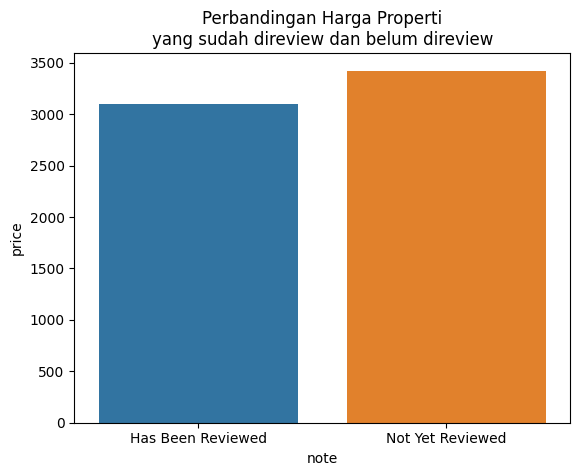

In [170]:
sns.barplot(data=df,x='note',y='price',hue='note',errorbar=None)
plt.title('Perbandingan Harga Properti\nyang sudah direview dan belum direview')
plt.show()

In [171]:
stats, pvalue = mannwhitneyu(df.loc[df['note']=='Has Been Reviewed','price'], df.loc[df['note']=='Not Yet Reviewed','price'],alternative='Less')
pvalue

2.3405707212577563e-08

In [172]:
H0 = "Harga Properti yang Telah Direview lebih mahal atau sama dengan Properti yang Belumh Direview"
Ha = "Harga Properti yang Telah Direview lebih murah daripada Properti yang Belumh Direview"
alpha = 0.05

if pvalue <= 0.05:
    print(f"Karena nilai P-value({round(pvalue, 3)}) < {alpha} maka H0 ditolak, jadi {Ha}")
else:
    print(f"Karena nilai P-value({round(pvalue, 3)}) > {alpha} maka H0 diterima, jadi {H0}")

Karena nilai P-value(0.0) < 0.05 maka H0 ditolak, jadi Harga Properti yang Telah Direview lebih murah daripada Properti yang Belumh Direview


In [173]:
df.groupby('note')['minimum_nights'].mean()

note
Has Been Reviewed    12.913752
Not Yet Reviewed     19.426770
Name: minimum_nights, dtype: float64

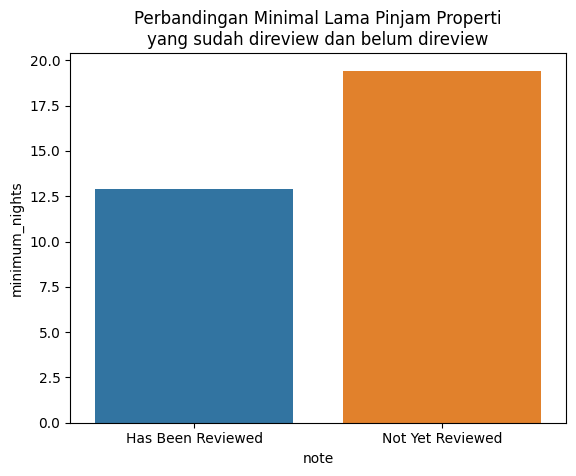

In [174]:
sns.barplot(data=df,x='note',y='minimum_nights',hue='note',errorbar=None)
plt.title('Perbandingan Minimal Lama Pinjam Properti\nyang sudah direview dan belum direview')
plt.show()

In [175]:
stats, pvalue = mannwhitneyu(df.loc[df['note']=='Has Been Reviewed','minimum_nights'], df.loc[df['note']=='Not Yet Reviewed','minimum_nights'])
pvalue

6.097246397504874e-11

In [176]:
H0 = "Minimal Lama Sewa Properti yang Telah Direview sama dengan Properti yang Belumh Direview"
Ha = "Minimal Lama Sewa Properti yang Telah Direview berbeda daripada Properti yang Belum Direview"
alpha = 0.05

if pvalue <= 0.05:
    print(f"Karena nilai P-value({round(pvalue, 3)}) < {alpha} maka H0 ditolak, jadi {Ha}")
else:
    print(f"Karena nilai P-value({round(pvalue, 3)}) > {alpha} maka H0 diterima, jadi {H0}")

Karena nilai P-value(0.0) < 0.05 maka H0 ditolak, jadi Minimal Lama Sewa Properti yang Telah Direview berbeda daripada Properti yang Belum Direview


In [177]:
df.groupby('note')['day_availability'].mean()

note
Has Been Reviewed    230.434420
Not Yet Reviewed     268.616062
Name: day_availability, dtype: float64

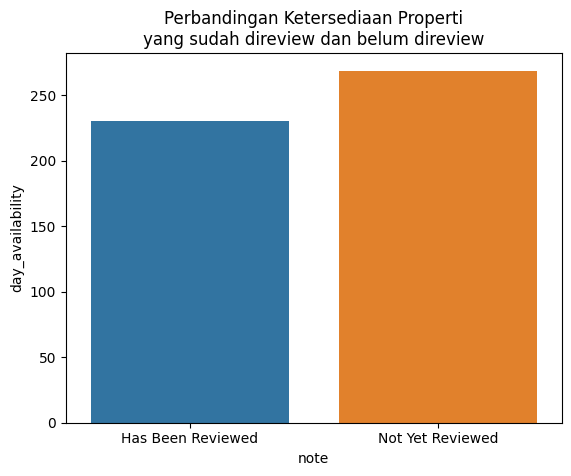

In [178]:
sns.barplot(data=df,x='note',y='day_availability',hue='note',errorbar=None)
plt.title('Perbandingan Ketersediaan Properti\nyang sudah direview dan belum direview')
plt.show()

In [179]:
stats, pvalue = mannwhitneyu(df.loc[df['note']=='Has Been Reviewed','day_availability'], df.loc[df['note']=='Not Yet Reviewed','day_availability'])
pvalue

5.786798779341817e-198

In [180]:
H0 = "Ketersediaan Properti yang Telah Direview sama dengan Properti yang Belumh Direview"
Ha = "Kertersediaan Properti yang Telah Direview berbeda daripada Properti yang Belum Direview"
alpha = 0.05

if pvalue <= 0.05:
    print(f"Karena nilai P-value({round(pvalue, 3)}) < {alpha} maka H0 ditolak, jadi {Ha}")
else:
    print(f"Karena nilai P-value({round(pvalue, 3)}) > {alpha} maka H0 diterima, jadi {H0}")

Karena nilai P-value(0.0) < 0.05 maka H0 ditolak, jadi Kertersediaan Properti yang Telah Direview berbeda daripada Properti yang Belum Direview


- **Variabel Reviews Per Month**  
Variabel ini menunjukkan ke konsitensian properti per bulannya apakah tetap ada yang mereview properti atau tidak. sehingga kita bisa tau bagaimana popularitas properti sepanjang tahun.


In [181]:
df['reviews_per_month'].describe().round(2)

count    15854.00
mean         0.52
std          0.95
min          0.00
25%          0.00
50%          0.09
75%          0.67
max         19.13
Name: reviews_per_month, dtype: float64

In [182]:
df_review['reviews_per_month'].describe().round(2)

count    10064.00
mean         0.81
std          1.09
min          0.01
25%          0.12
50%          0.44
75%          1.06
max         19.13
Name: reviews_per_month, dtype: float64

In [183]:
df_review.loc[df['reviews_per_month']>5,'id'].count()

85

In [184]:
df_review.loc[df['reviews_per_month']>5,'cost'].value_counts()

cost
Cheap Price        85
Medium Price        0
Expensive Price     0
Name: count, dtype: int64

Text(0.5, 1.0, 'Harga Properti dengan Reviews per Month lebih dari 5')

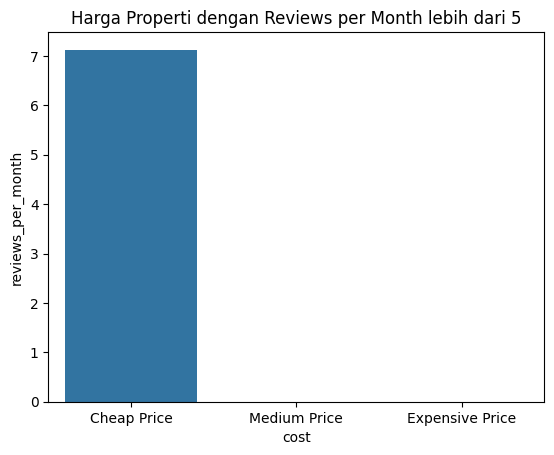

In [185]:
sns.barplot(data = df_review.loc[df['reviews_per_month']>5],x='cost',y='reviews_per_month',errorbar=None)
plt.title('Harga Properti dengan Reviews per Month lebih dari 5')

In [186]:
df_review.loc[df['reviews_per_month']>5,'rental_length'].value_counts()

rental_length
Daily     84
Weekly     1
Name: count, dtype: int64

Text(0.5, 1.0, 'Lama Sewa Properti dengan Reviews per Month lebih dari 5')

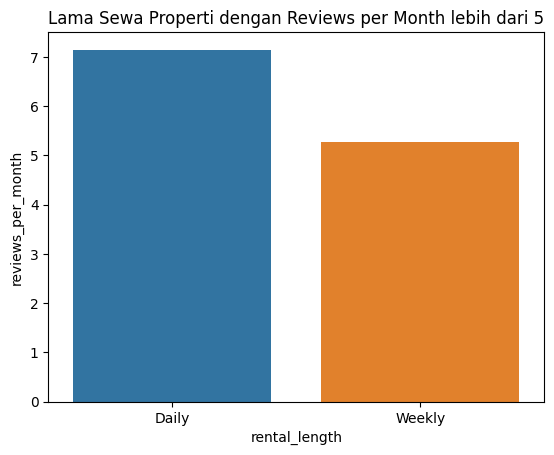

In [187]:
sns.barplot(data = df_review.loc[df['reviews_per_month']>5],x='rental_length',y='reviews_per_month',hue='rental_length',errorbar=None)
plt.title('Lama Sewa Properti dengan Reviews per Month lebih dari 5')

In [188]:
df_review.loc[df['reviews_per_month']>5,'room_type'].value_counts()

room_type
Entire home/apt    68
Private room       14
Hotel room          3
Name: count, dtype: int64

Text(0.5, 1.0, 'Tipe Properti dengan Reviews per Month lebih dari 5')

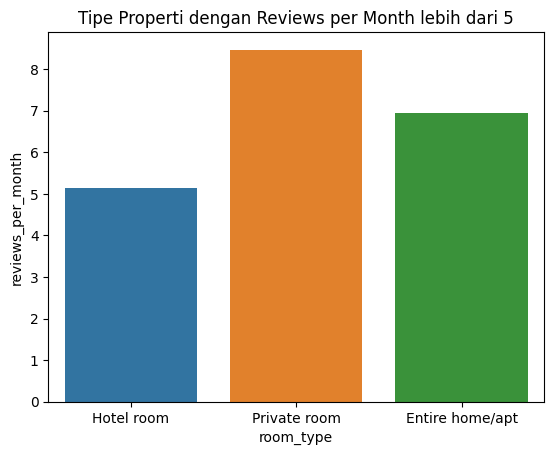

In [189]:
sns.barplot(data = df_review.loc[df['reviews_per_month']>5],x='room_type',y='reviews_per_month',hue='room_type',errorbar=None)
plt.title('Tipe Properti dengan Reviews per Month lebih dari 5')

- **Variabel Last 12 Month Review**  
Variabel ini menunjukkan popularitas/keaktifan properti dalam 1 tahun kebelakang. Jadi bisa dikatakan bahwa semakin tinggi nilai variabel ini maka properti tersebut masih eksis atau relevan dengan minat penyewa sekarang.

In [190]:
df.loc[df['total_reviews']>0,'last_12months_review'].describe().round(2)

count    10064.00
mean         5.48
std         10.69
min          0.00
25%          0.00
50%          2.00
75%          6.00
max        325.00
Name: last_12months_review, dtype: float64

In [191]:
df_review.loc[df['last_12months_review']>50,'id'].count()

51

In [192]:
df_review.loc[df['last_12months_review']>50,'cost'].value_counts()

cost
Cheap Price        51
Medium Price        0
Expensive Price     0
Name: count, dtype: int64

Text(0.5, 1.0, 'Harga Properti dengan Reviews 12 bulan terakhir lebih dari 50')

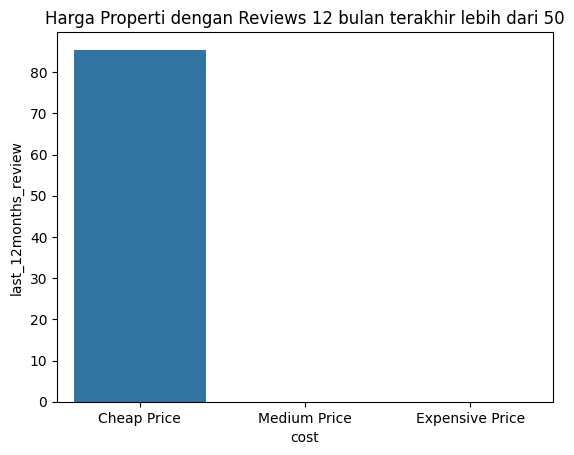

In [193]:
sns.barplot(data = df_review.loc[df['last_12months_review']>50],x='cost',y='last_12months_review',errorbar=None)
plt.title('Harga Properti dengan Reviews 12 bulan terakhir lebih dari 50')

In [194]:
df_review.loc[df['last_12months_review']>50,'rental_length'].value_counts()

rental_length
Daily    51
Name: count, dtype: int64

Text(0.5, 1.0, 'Lama Sewa Properti dengan Reviews 12 bulan terakhir lebih dari 50')

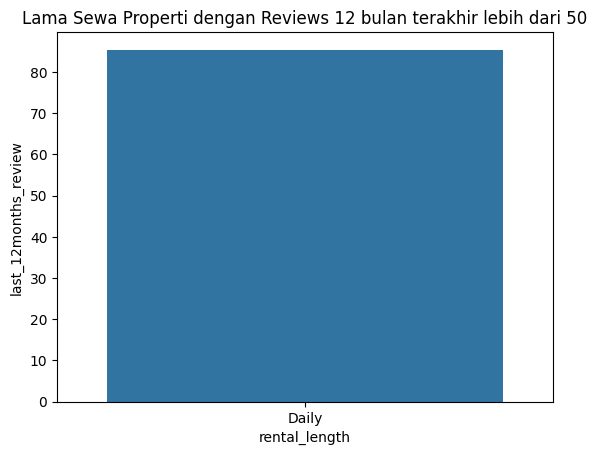

In [195]:
sns.barplot(data = df_review.loc[df['last_12months_review']>50],x='rental_length',y='last_12months_review',errorbar=None)
plt.title('Lama Sewa Properti dengan Reviews 12 bulan terakhir lebih dari 50')

In [196]:
df_review.loc[df['last_12months_review']>50,'room_type'].value_counts()

room_type
Entire home/apt    40
Private room        9
Hotel room          2
Name: count, dtype: int64

Text(0.5, 1.0, 'Jenis Properti dengan Reviews 12 bulan terakhir lebih dari 50')

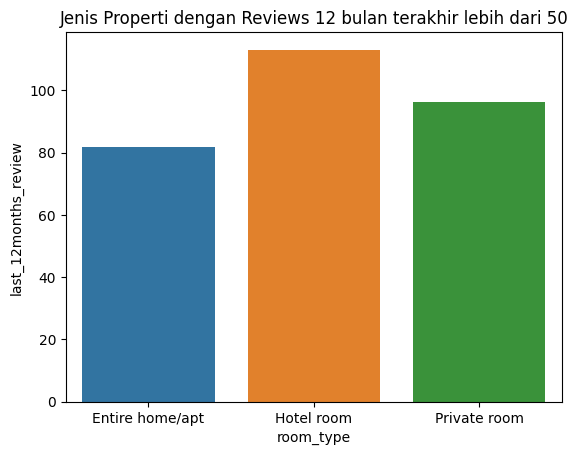

In [197]:
sns.barplot(data = df_review.loc[df['last_12months_review']>50],x='room_type',y='last_12months_review',errorbar=None,hue='room_type')
plt.title('Jenis Properti dengan Reviews 12 bulan terakhir lebih dari 50')

## Korelasi variabel numerik dengan variabel target

In [198]:
df_review = df.loc[df['total_reviews']>0]

In [199]:
df_num = df_review.select_dtypes('number').drop(columns=["id","host_id","latitude","longitude"])
df_num.head()

price  minimum_nights  total_reviews  reviews_per_month  ownership_amount  \
0   1905               3             65               0.50                 2   
3   1286               7              2               0.03                 1   
5   1000             250             19               0.17                41   
6   1558               3              1               0.01                 1   
8   1558               3             10               0.09                 1   

   day_availability  last_12months_review  
0               353                     0  
3               323                     1  
5               365                     0  
6               365                     0  
8               365                     0

### Scaterplot Variabel Numerik dengan variabel target

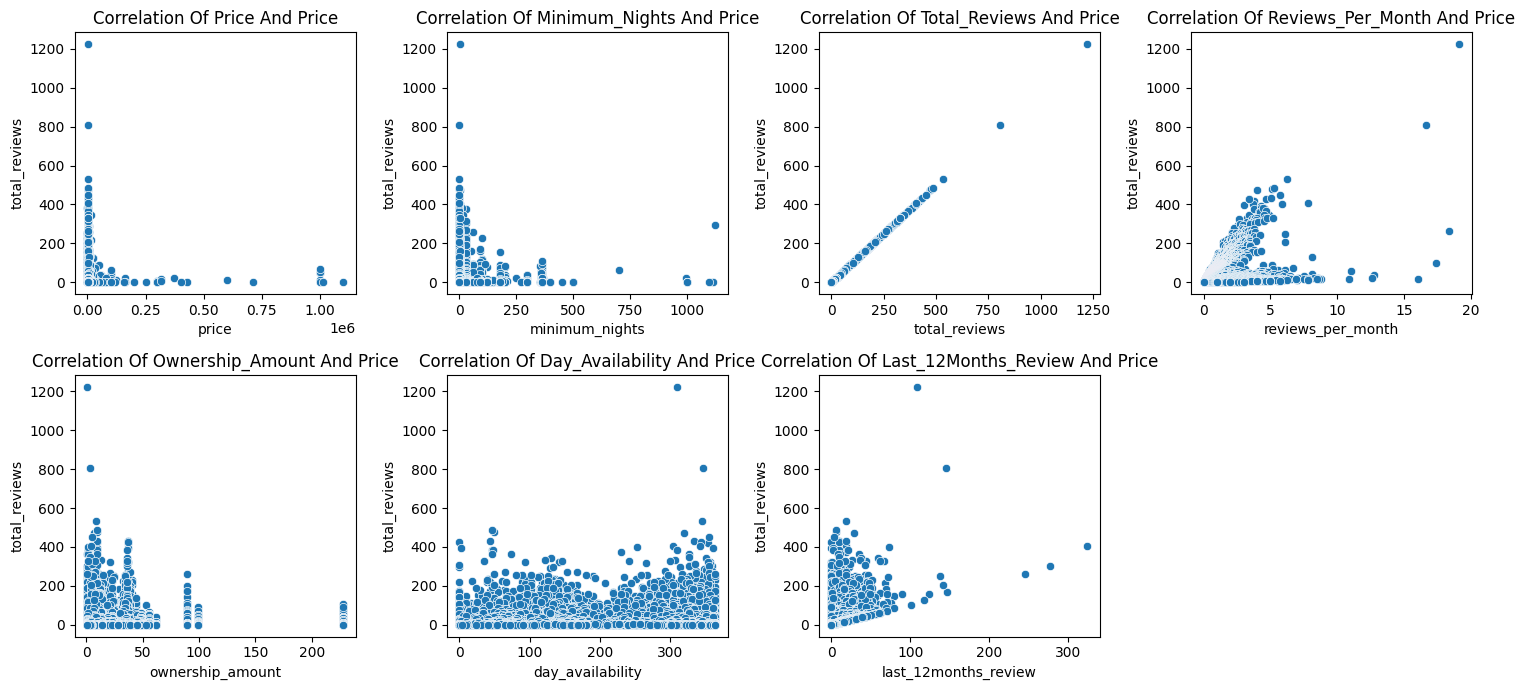

In [200]:
plt.figure(figsize = (15, 7))

for idx, col in enumerate(df_num.columns) :
  scatter = sns.scatterplot(x=df[col], y=df['total_reviews'].round(2), ax = plt.subplot(2, 4, idx + 1))
  scatter.set_title(f'Correlation of {col} and price'.title())

plt.tight_layout()
plt.show()

### Distribusi Variabel Numerik

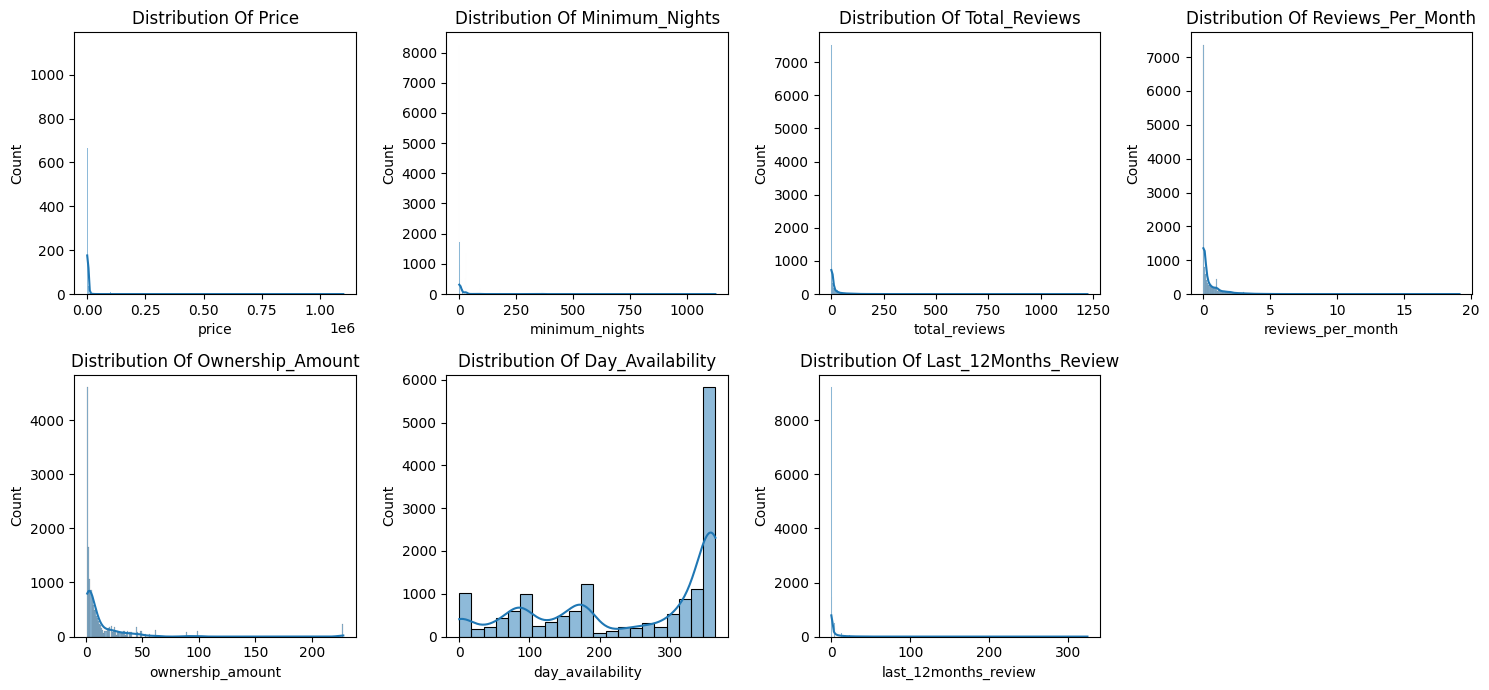

In [201]:
plt.figure(figsize = (15, 7))

for idx, col in enumerate(df_num.columns) :
  hist = sns.histplot(df[col], kde = True, ax = plt.subplot(2, 4, idx + 1))
  hist.set_title(f'Distribution of {col}'.title())

plt.tight_layout()
plt.show()

In [202]:
# cek distribusi kolom city_development_index
from scipy.stats import kstest
for col in df_num.columns :
  stats, pval = kstest('norm', df[col])
  if pval<=0.05:
      print(f'variabel {col} tidak berdistribusi normal') #Ha
  else:
      print(f'variabel {col} berdistribusi normal') #Ho

variabel price tidak berdistribusi normal
variabel minimum_nights tidak berdistribusi normal
variabel total_reviews tidak berdistribusi normal
variabel reviews_per_month tidak berdistribusi normal
variabel ownership_amount tidak berdistribusi normal
variabel day_availability tidak berdistribusi normal
variabel last_12months_review tidak berdistribusi normal


### Korelasi Shapiro Variabel Numerik dengan target

In [203]:
for col in df_num.drop(columns=['total_reviews','reviews_per_month','last_12months_review']).columns:
  r = df[['total_reviews', col]].corr(method='spearman').iloc[0,1]
  print(f"Korelasi Variabel {col} dengan variabel number_of_reviews adalah {r}")

Korelasi Variabel price dengan variabel number_of_reviews adalah -0.02065908969363271
Korelasi Variabel minimum_nights dengan variabel number_of_reviews adalah 0.036322543534481215
Korelasi Variabel ownership_amount dengan variabel number_of_reviews adalah 0.2211423326158468
Korelasi Variabel day_availability dengan variabel number_of_reviews adalah -0.26404412920220355


In [204]:
for col in df_num.drop(columns=['total_reviews','reviews_per_month','last_12months_review']).columns:
  r = df[['reviews_per_month', col]].corr(method='spearman').iloc[0,1]
  print(f"Korelasi Variabel {col} dengan variabel number_of_reviews adalah {r}")

Korelasi Variabel price dengan variabel number_of_reviews adalah 0.017221423434684198
Korelasi Variabel minimum_nights dengan variabel number_of_reviews adalah 0.019226670710891777
Korelasi Variabel ownership_amount dengan variabel number_of_reviews adalah 0.28486330333630244
Korelasi Variabel day_availability dengan variabel number_of_reviews adalah -0.2519462601303312


In [205]:
for col in df_num.drop(columns=['total_reviews','reviews_per_month','last_12months_review']).columns:
  r = df[['last_12months_review', col]].corr(method='spearman').iloc[0,1]
  print(f"Korelasi Variabel {col} dengan variabel number_of_reviews adalah {r}")

Korelasi Variabel price dengan variabel number_of_reviews adalah 0.043726302776602284
Korelasi Variabel minimum_nights dengan variabel number_of_reviews adalah 0.012732793760735777
Korelasi Variabel ownership_amount dengan variabel number_of_reviews adalah 0.27646223890190175
Korelasi Variabel day_availability dengan variabel number_of_reviews adalah -0.21287378473061364


## Persebaran unit AirBNB di bangkok berdasarkan kolom neighbourhood

In [206]:
df_ct=pd.crosstab(df['neighbourhood'],df['room_type'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values('Total',ascending=False).head(10)

room_type      Entire home/apt  Hotel room  Private room  Shared room  Total
neighbourhood                                                               
Vadhana                   1451         105           544           53   2153
Khlong Toei               1520          73           489           15   2097
Huai Khwang                776          25           301           23   1125
Ratchathewi                656          70           327           61   1114
Bang Rak                   351          67           375           34    827
Sathon                     557          15           220           17    809
Phra Nakhon                 56          77           355          131    619
Phra Khanong               336           9           201           12    558
Chatu Chak                 273           2           266            7    548
Bang Na                    278           9           168            3    458

Lokasi di bangkok yang memiliki banyak unit airbnb adalah daerah pariwisata sehingga banyak turis yang berkunjung sehingga lebih banyak orang yang menyewa tempat untuk menginap

## Perbandingan total_reviews unit AirBNB berdasarkan neighbourhood dan room type

In [207]:
df_ct=pd.crosstab(df['neighbourhood'],df['room_type'],values=df['total_reviews'],aggfunc=np.mean).round(2)
df_ct['Rata-rata']=df_ct.mean(axis=1).round(2)
df_ct.sort_values('Rata-rata',ascending=False).head(10)

room_type             Entire home/apt  Hotel room  Private room  Shared room  \
neighbourhood                                                                  
Pom Prap Sattru Phai            41.61       21.64         29.78        11.60   
Phaya Thai                      50.52       23.62         15.68        12.37   
Khlong Toei                     22.62       58.21          5.38         1.73   
Lat Krabang                     18.67       45.71         15.94         2.88   
Suanluang                       16.64       54.00          2.79         8.40   
Sathon                          35.13       21.93          9.88        10.24   
Dusit                           52.25         NaN          2.45         1.00   
Ratchathewi                     21.34       30.97         12.22         8.79   
Bang Rak                        38.75       11.03          8.18         7.24   
Phra Nakhon                     26.95       14.45         14.20         3.66   

room_type             Rata-rata  
neighbourhood                    
Pom Prap Sattru Phai      26.16  
Phaya Thai                25.55  
Khlong Toei               21.98  
Lat Krabang               20.80  
Suanluang                 20.46  
Sathon                    19.29  
Dusit                     18.57  
Ratchathewi               18.33  
Bang Rak                  16.30  
Phra Nakhon               14.81

In [208]:
df_ct.sort_values('Rata-rata').head(10)

room_type        Entire home/apt  Hotel room  Private room  Shared room  \
neighbourhood                                                             
Nong Khaem                  0.00         NaN          0.14          NaN   
Bang Bon                    0.50         NaN          0.00          NaN   
Nong Chok                   0.38         NaN          0.17          NaN   
Sai Mai                     0.17         NaN          0.86          NaN   
Taling Chan                 0.67         NaN          1.00          1.0   
Thawi Watthana              0.80         NaN          1.00          NaN   
Thung khru                  0.78         NaN          1.07          NaN   
Wang Thong Lang             2.36         NaN          1.25          0.0   
Khlong Sam Wa               1.15         NaN          1.58          NaN   
Bang Khae                   3.29         1.0          0.77          NaN   

room_type        Rata-rata  
neighbourhood               
Nong Khaem            0.07  
Bang Bon              0.25  
Nong Chok             0.28  
Sai Mai               0.52  
Taling Chan           0.89  
Thawi Watthana        0.90  
Thung khru            0.92  
Wang Thong Lang       1.20  
Khlong Sam Wa         1.36  
Bang Khae             1.69

Folium Map

In [209]:
import folium

In [210]:
import json
with open("Bangkok-districts.geojson") as fo:
  data_str = fo.read()
data = json.loads(data_str)
# data


In [211]:
df.head()

id                                            name  host_id  \
0   27934                 Nice room with superb city view   120437   
1   27979                  Easy going landlord,easy place   120541   
2   28745               modern-style apartment in Bangkok   123784   
3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   
4  941865                      Suite Room 3 at MetroPoint   610315   

    host_name neighbourhood  latitude  longitude        room_type  price  \
0      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   1905   
1         Emy       Bang Na  13.66818  100.61674     Private room   1316   
2  Familyroom     Bang Kapi  13.75232  100.62402     Private room    800   
3     Sirilak     Din Daeng  13.78823  100.57256     Private room   1286   
4       Kasem     Bang Kapi  13.76872  100.63338     Private room   1905   

   minimum_nights  total_reviews          last_review  reviews_per_month  \
0               3             65  2020-01-06 00:00:00               0.50   
1               1              0     Not Yet Reviewed               0.00   
2              60              0     Not Yet Reviewed               0.00   
3               7              2  2022-04-01 00:00:00               0.03   
4               1              0     Not Yet Reviewed               0.00   

   ownership_amount  day_availability  last_12months_review  \
0                 2               353                     0   
1                 2               358                     0   
2                 1               365                     0   
3                 1               323                     1   
4                 3               365                     0   

                note rental_length         cost  
0  Has Been Reviewed         Daily  Cheap Price  
1   Not Yet Reviewed         Daily  Cheap Price  
2   Not Yet Reviewed       Monthly  Cheap Price  
3  Has Been Reviewed         Daily  Cheap Price  
4   Not Yet Reviewed         Daily  Cheap Price

In [212]:
df_district = df.groupby('neighbourhood')[['price','total_reviews','minimum_nights','day_availability']].mean()
df_district['property'] =df.groupby('neighbourhood')['name'].count()
df_district = df_district.reset_index()
df_district.head()

neighbourhood        price  total_reviews  minimum_nights  \
0       Bang Bon  1504.400000       0.200000        3.600000   
1      Bang Kapi  3082.034615       6.984615       14.323077   
2      Bang Khae  1849.739130       1.728261        8.108696   
3      Bang Khen  2194.689655       6.327586       10.517241   
4  Bang Kho laen  2408.114286      18.700000       37.828571   

   day_availability  property  
0        365.000000         5  
1        270.019231       260  
2        286.586957        92  
3        264.422414       116  
4        259.478571       140

In [213]:
print('Perbandingan Jumlah Properti Berdasarkan District Bangkok')
bgk_map = folium.Map(location=[13.75058, 100.49258])

bgk_jason = r"Bangkok-districts.geojson"
kel = folium.Choropleth(
    geo_data=bgk_jason,
    data = df_district,
    columns = ["neighbourhood","property"],
    key_on = "feature.properties.dname_e",
    name = "feature.properties.dname_e"
)

kel.add_to(bgk_map)
bgk_map

Perbandingan Jumlah Properti Berdasarkan District Bangkok


In [214]:
# print('Perbandingan Rata-Rata Harga Sewa Properti Berdasarkan District Bangkok')
# bgk_map = folium.Map(location=[13.75058, 100.49258])

# bgk_jason = r"Bangkok-districts.geojson"
# kel = folium.Choropleth(
#     geo_data=bgk_jason,
#     data = df_district,
#     columns = ["neighbourhood","price"],
#     key_on = "feature.properties.dname_e",
#     name = "feature.properties.dname_e"
# )

# kel.add_to(bgk_map)
# bgk_map

In [215]:
# print('Perbandingan Rata-Rata Jumlah Review Properti Berdasarkan District Bangkok')
# bgk_map = folium.Map(location=[13.75058, 100.49258])

# bgk_jason = r"Bangkok-districts.geojson"
# kel = folium.Choropleth(
#     geo_data=bgk_jason,
#     data = df_district,
#     columns = ["neighbourhood","total_reviews"],
#     key_on = "feature.properties.dname_e",
#     name = "feature.properties.dname_e"
# )

# kel.add_to(bgk_map)
# bgk_map

In [216]:
# print('Perbandingan Rata-Rata Minimal Lama Sewa Properti Berdasarkan District Bangkok')
# bgk_map = folium.Map(location=[13.75058, 100.49258])

# bgk_jason = r"Bangkok-districts.geojson"
# kel = folium.Choropleth(
#     geo_data=bgk_jason,
#     data = df_district,
#     columns = ["neighbourhood","minimum_nights"],
#     key_on = "feature.properties.dname_e",
#     name = "feature.properties.dname_e"
# )

# kel.add_to(bgk_map)
# bgk_map

In [217]:
# print('Perbandingan Rata-Rata Ketersediaan Properti Berdasarkan District Bangkok')
# bgk_map = folium.Map(location=[13.75058, 100.49258])

# bgk_jason = r"Bangkok-districts.geojson"
# kel = folium.Choropleth(
#     geo_data=bgk_jason,
#     data = df_district,
#     columns = ["neighbourhood","day_availability"],
#     key_on = "feature.properties.dname_e",
#     name = "feature.properties.dname_e"
# )

# kel.add_to(bgk_map)
# bgk_map

## Perbandingan total review sewa berdasarkan jenis unit

In [218]:
grup= df.groupby('room_type')['name'].count().sort_values()
grup

room_type
Shared room         523
Hotel room          649
Private room       5770
Entire home/apt    8912
Name: name, dtype: int64

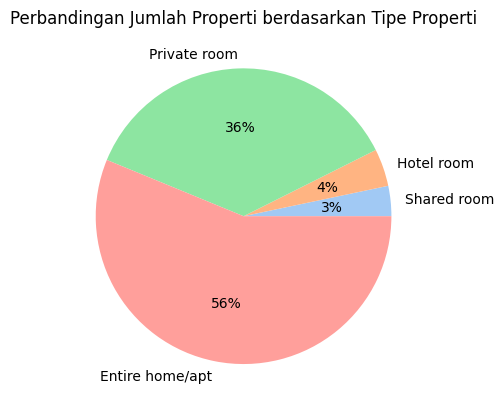

In [219]:
plt.pie(x=grup,labels=grup.index, autopct='%.0f%%',colors=sns.color_palette('pastel'))
plt.title('Perbandingan Jumlah Properti berdasarkan Tipe Properti')
plt.show()

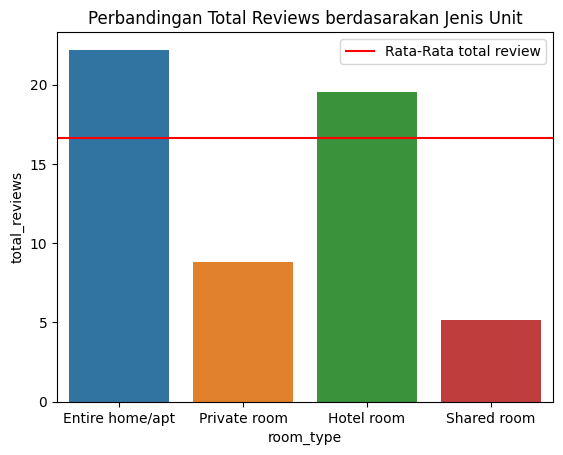

In [220]:
sns.barplot(x=df["room_type"],y=df["total_reviews"].sort_values(ascending=False),errorbar=None,hue=df["room_type"])
plt.title("Perbandingan Total Reviews berdasarakan Jenis Unit")
plt.axhline(y=df["total_reviews"].mean(),color="red",label="Rata-Rata total review")
plt.legend()
plt.show()

## Pemilik Properti dengan toral review properti terbanyak

In [221]:
df_h = df.groupby("host_name").agg({'name':'count','total_reviews' : 'mean'}).round(2).sort_values(by=["name","total_reviews"],ascending=False).rename({'total_reviews':'avg_reviews','name':'total_property'},axis=1)
df_h.loc[df_h['avg_reviews']>20].head(10)

total_property  avg_reviews
host_name                             
Curry                 228        20.65
K                      91        32.55
Bee                    62        45.53
Alex                   62        40.94
Ed                     60        46.95
Patty                  54        54.24
Tony                   50       100.20
Eva                    50        26.30
Max                    49        59.49
Wimonpak               41        56.54

## 10 distrik dengan rata rata harga sewa airbnb tertinggi dan terendah

In [222]:
# 10 kota dengan harga paling mahal
df_n = df.groupby("neighbourhood")[["price"]].mean().reset_index().sort_values(by="price",ascending=False).head(10)
df_n

neighbourhood        price
7        Bang Phlat  6257.488479
18      Huai Khwang  5036.084444
21       Khlong San  4772.330532
47          Vadhana  4452.131444
29      Parthum Wan  4355.628571
22      Khlong Toei  4249.329995
25        Lat Phrao  3538.596491
5   Bang Khun thain  3404.714286
27        Nong Chok  3279.928571
37      Ratchathewi  3199.271993

<ipython-input-223-246738564a68>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df_n["neighbourhood"],hue=df_n["neighbourhood"],y=df_n["price"],ci=None)


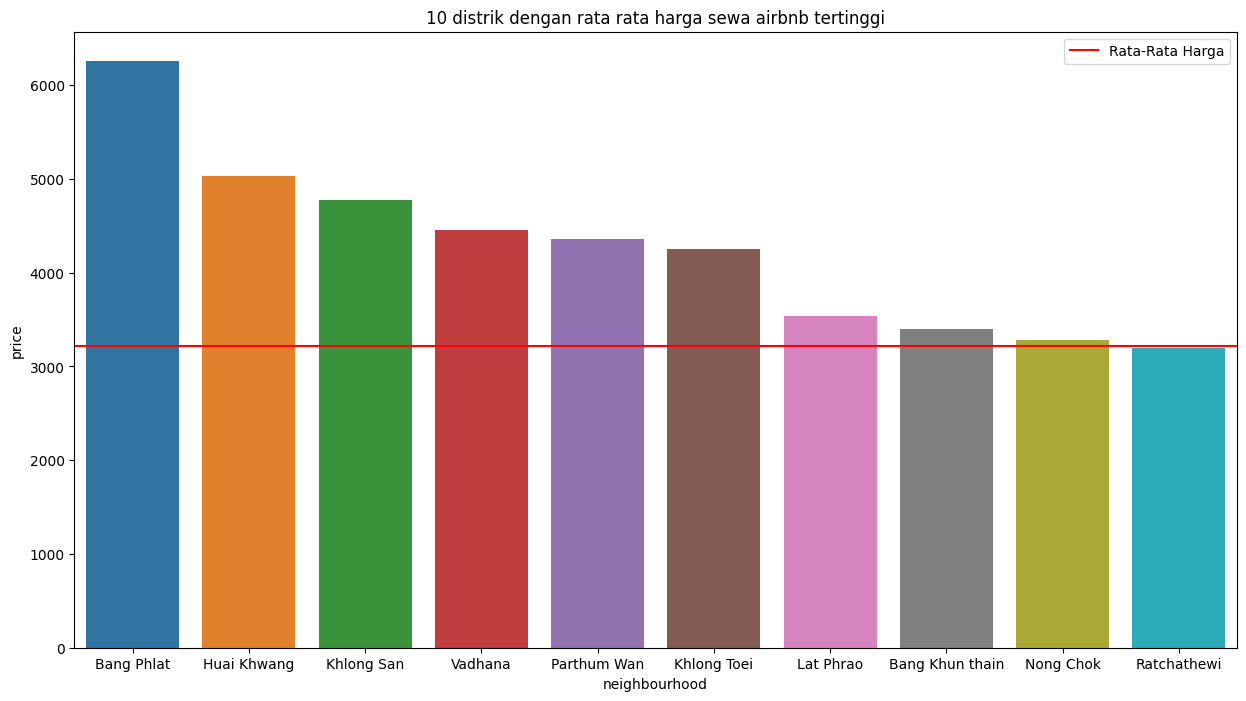

In [223]:
plt.figure(figsize=(15,8))
sns.barplot(x=df_n["neighbourhood"],hue=df_n["neighbourhood"],y=df_n["price"],ci=None)
plt.title("10 distrik dengan rata rata harga sewa airbnb tertinggi")
plt.axhline(y=df["price"].mean(),color="red",label="Rata-Rata Harga")
plt.legend()
plt.show()

In [224]:
# 10 kota dengan harga paling murah
df_n = df.groupby("neighbourhood")[["price"]].mean().reset_index().sort_values(by="price").head(10)
df_n

neighbourhood        price
23           Lak Si  1143.833333
28       Nong Khaem  1205.222222
16       Don Mueang  1273.910180
24      Lat Krabang  1358.523490
30    Phasi Charoen  1370.219355
26         Min Buri  1379.225806
32     Phra Khanong  1483.254480
0          Bang Bon  1504.400000
36       Rat Burana  1603.245283
48  Wang Thong Lang  1668.430000

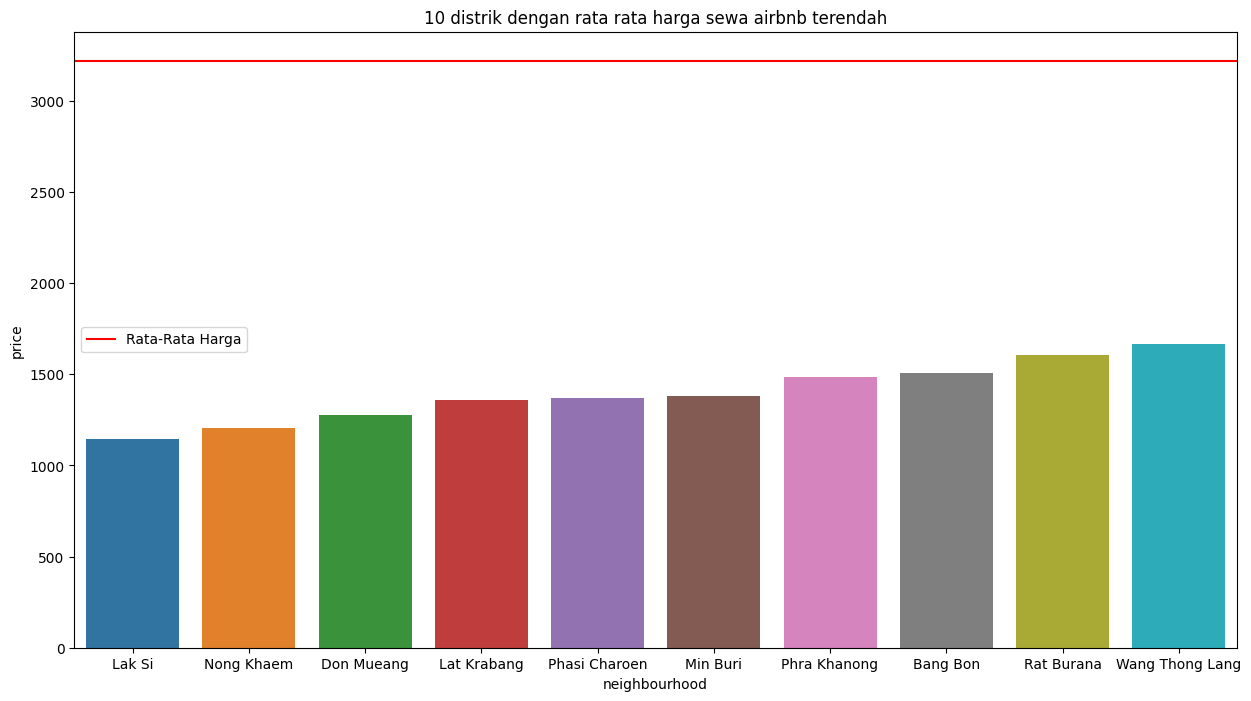

In [225]:
plt.figure(figsize=(15,8))
sns.barplot(x=df_n["neighbourhood"],y=df_n["price"],errorbar=None,hue=df_n["neighbourhood"])
plt.title("10 distrik dengan rata rata harga sewa airbnb terendah")
plt.axhline(y=df["price"].mean(),color="red",label="Rata-Rata Harga")
plt.legend()
plt.show()

## Perbandingan Harga unit dengan jenis unit

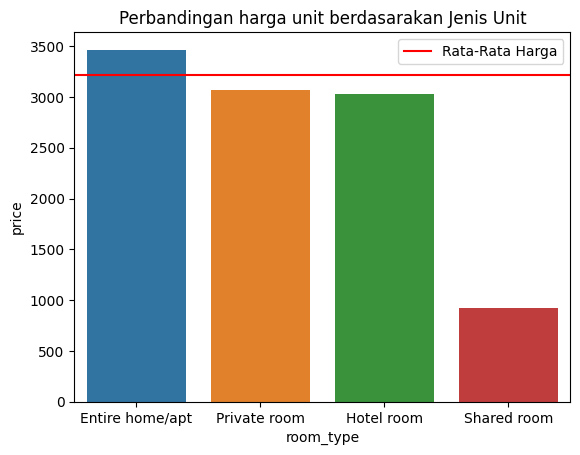

In [226]:
sns.barplot(x=df["room_type"],y=df["price"].sort_values(ascending=False),errorbar=None,hue=df["room_type"])
plt.title("Perbandingan harga unit berdasarakan Jenis Unit")
plt.axhline(y=df["price"].mean(),color="red",label="Rata-Rata Harga")
plt.legend()
plt.show()

## World Cloud nama properti yang populer

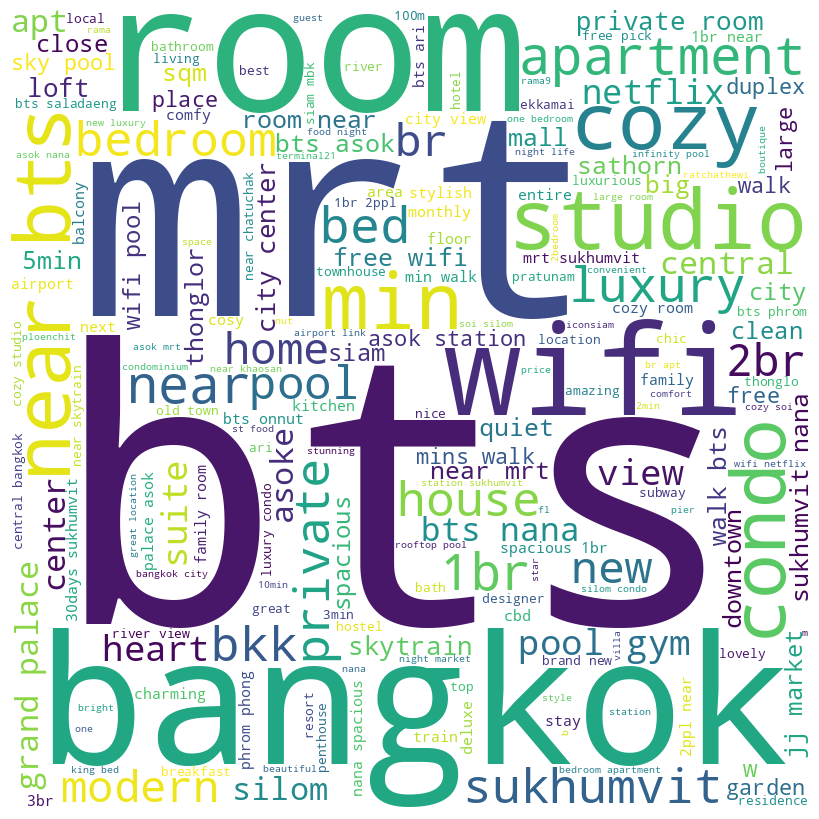

In [227]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.loc[df['total_reviews']>=28,'name']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

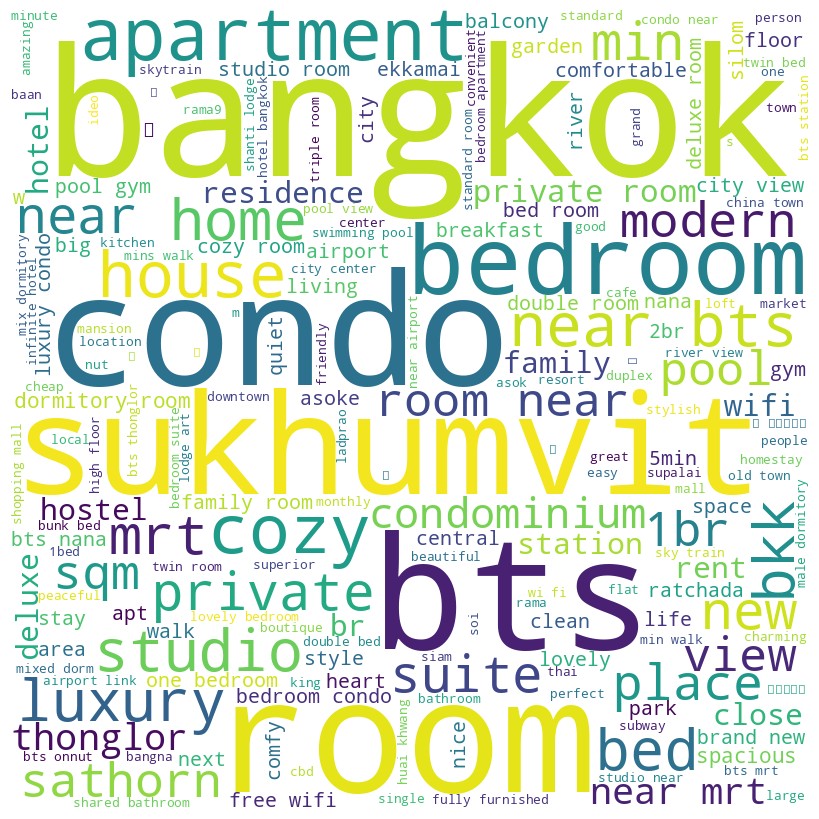

In [228]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.loc[df['total_reviews']==0,'name']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Kesimpulan dan Rekomendasi

**Kesimpulan**  
Dari analisis yang telah dilakukan, kita bisa membuat kesilpulan berikut:
- Properti yang telah direview memiliki karakterstik yang berbeda dengan Properti yang belum direview yaitu **harganya lebih murah**, **minimal lama sewa lebih pendek**, dan **ketersediaan harinya yang lebih sedikit** terutama pada **tipe entire home/apt dan hotel**.
- Properti yang konsisten popularitasnya adalah properti dengan nilai `review_per_month` yang tinggi, dan berkarakteristik memiliki harga yang murah, minimal lama sewa dibawah 30 hari dan khusunya tipe private_room
- Properti yang tetap eksis/relevan dengan penyewa sekarang adalah properti dengan nilai `last_12month_review` yang tinggi dimana memiliki karakteristik harga murah, minimal lama sewa dibawah 7 hari terutama pada properti bertipe hotel.




**Rekomendasi**


Rekomendasi untuk para pemilik properti yang ingin atau akan mendaftarkan propertinya ke airbnb disarankan :
- Penentuan harga properti disesuaikan dengan rata-rata harga sewa properti didistrik properti tersebut dan tipe propertinya. Dan disarankan memberikan harga yang lebih murah dari properti lain namun masih tetap diatas rata-rata harga sewa properti di wilayah tersebut.

- Penentuan nama properti yang akan dilisting di aribnb sebaiknya menyematkan kelebihan properti, fitur fitur properti ataupun kata kata promosi.

- Penyesuaian karakteristik properti agar dapat menyesuaikan karakteristik properti yang populer seperti pada kesimpulan yang telah terdaftar di airbnb terlebih dahulu.

- Berkonsultasi pada pemilik properti yang telah terdaftar di airbnb dengan propertinya yang sudah banyak direview, agar dapat memanajemen propertinya menjadi lebih baik.